---

# Project: Customer Demand Analysis For Online Delivery App

## Introduction

This project involves performing an exploratory data analysis (EDA) on sample data from an online food ordering and delivery app for New York restaurants, uncovering key business metrics to improve operations, enhance customer satisfaction, and drive company growth.

### Context

The number of restaurants in New York is steadily increasing, with many students and busy professionals relying on these establishments due to their hectic lifestyles. Online food delivery services provide a convenient option, offering access to favorite restaurants through a single app. FoodHub, a food aggregator company, facilitates this by connecting multiple restaurants to customers via a smartphone app.

The app allows restaurants to receive direct online orders from customers. FoodHub assigns a delivery person to pick up the order from the restaurant once confirmed. The delivery person then uses the app to navigate to the restaurant, waits for the food package, and confirms pick-up in the app. After delivering the food to the customer's location, the delivery person confirms the drop-off. Customers can rate their orders in the app. FoodHub earns revenue by collecting a fixed margin from each delivery order.

### Objective

The food aggregator company has stored order data from registered customers in their online portal. As a Data Scientist, your job is to analyze this data to provide insights on key business metrics, improving operations, growth, and customer satisfaction.

### Data Dictionary

The dataset contains various details related to each food order, described as follows:

- **order_id**: Unique ID of the order
- **customer_id**: ID of the customer who ordered the food
- **restaurant_name**: Name of the restaurant
- **cuisine_type**: Cuisine ordered by the customer
- **cost**: Cost of the order
- **day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (Weekdays: Monday to Friday; Weekends: Saturday and Sunday)
- **rating**: Rating given by the customer out of 5
- **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food, calculated as the difference between the restaurant's order confirmation and the delivery person's pick-up confirmation timestamps
- **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package, calculated as the difference between the delivery person's pick-up confirmation and drop-off timestamps

---

## Importing Necessary Libraries and Data

This section sets up the environment by importing tools for data manipulation, visualization, handling special characters, and conducting statistical analysis

In [69]:
# from google.colab import drive
# drive.mount('/content/drive')

In [70]:
# Import library to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [71]:
# Import libariers for special characters
import re 

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import libaries for statistical analysis
import scipy.stats as stats

## Loading Data

This section involves reading the dataset from a CSV file into a pandas DataFrame for further analysis.

In [72]:
# Read the DataFrame
data = pd.read_csv("foodhub_order.csv")

# Create copy of the DataFrame
df = data.copy()

## Data Overview

This section provides a high-level summary of the DataFrame, including the dimensions, data types, and an initial look at the first and last few rows. It checks for duplicate records and counts the unique values for each feature, confirming data integrity and providing an overview of the dataset’s structure.

### High-Level Data Information

In [73]:
# Number of rows and columns
df.shape

(1898, 9)

In [74]:
# First 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [75]:
# Last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [76]:
# Summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**
- The DataFrame has **1,898 observations and 9 columns**.
- Data types include int64, object, and float64.
- No missing values, as row counts match non-null counts for each column.
- The 'rating' column is an object data type due to 'Not given' string entries.

### Unique and Duplicate Values

In [77]:
# Number of duplicate rows
dvalues = df.duplicated().sum()

# Convert into DataFrame
duplicate_df = pd.DataFrame({"metric": ["duplicate_rows"], "count": [dvalues]})

# Display DataFrame
duplicate_df

,metric,count
0,duplicate_rows,0


In [78]:
# Number of unique values per feature
nuniq = df.nunique().reset_index()

# Rename column names
nuniq.columns = ["feature", "unique values"]

# Display DataFrame
nuniq

,feature,unique values
0,order_id,1898
1,customer_id,1200
2,restaurant_name,178
3,cuisine_type,14
4,cost_of_the_order,312
5,day_of_the_week,2
6,rating,4
7,food_preparation_time,16
8,delivery_time,19


**Observations**:
- **Duplicate Records**: The dataset is free of duplicate entries, ensuring the integrity of the data.
- **Order and Customer Data:** There are 1,898 orders made by 1,200 customers.
- **Restaurant and Cuisine Data:** The dataset includes 178 restaurants and 14 cuisine types.
- **Additional Details:** More insights and specifics are provided in the subsequent sections.

## Data Preprocessing

This section focuses on cleaning and preparing the data for subsequent analysis. Entries of categorical features with special characters are identified and corrected, and new features are computed and added to the DataFrame.

### Special Characters

In [79]:
# Unique restaurant names
lst_rn = df.restaurant_name.unique()


# Function to check for special characters
def contains_special_char(s):
    special_char_pattern = re.compile(r"[^a-zA-Z0-9_! '&.-]")
    return bool(special_char_pattern.search(s))


# List of unique restaurant names with special characters
strings_with_special_chars = [s for s in lst_rn if contains_special_char(s)]

# Convert to DataFrame
pd.DataFrame(strings_with_special_chars, columns=["restaurant_name"])

,restaurant_name
0,Big Wong Restaurant _¤¾Ñ¼
1,Empanada Mama (closed)
2,Chipotle Mexican Grill $1.99 Delivery
3,Joe's Shanghai _Àü£¾÷´
4,CafÌ© China
5,Dirty Bird To Go (archived)
6,DespaÌ±a


In [80]:
# List of corrected restaurant names
replacement_list = [
    "Big Wong Restaurant",
    "Empanada Mama",
    "Chipotle Mexican Grill",
    "Joes Shanghai",
    "Cafe Chine",
    "Dirty Bird To Go",
    "Despana",
]

# Dictionary of restaurant names with special characters and the corrected version
replacement_dict = dict(zip(strings_with_special_chars, replacement_list))

# Replace values in the DataFrame using the dictionary
df["restaurant_name"] = df["restaurant_name"].replace(replacement_dict)

**Observations:**
- Out of all categorical features, only one exhibits the presence of special characters. 
- In total, 7 restaurant names exhibit special characters.
- Updated the 'restaurant_name' column by replacing names with special characters using a predefined replacement list.

### Feature Engineering

In [81]:
# Compute the total order completion time for each order
order_completion_time = df["food_preparation_time"] + df["delivery_time"]

# Add new column to DataFrame and set dtype to 'int64'
df["order_completion_time"] = order_completion_time.astype("int64")

In [82]:
# Summary of DataFrame | # Re-evaluate with the new column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   order_completion_time  1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


**Observations:**
- A new feature was added to the DataFrame, representing the sum of food preparation and delivery time per order.
- This feature is of type 'int64' and contains no missing values.

## Exploratory Data Analysis

This section includes custom functions for data analysis and visualization, a comprehensive statistical analysis of the DataFrame, and univariate and multivariate analyses to examine distributions, key statistics, business metrics, and relationships between categorical and numerical features.

### Defintion of Functions

In [83]:
# Function to calculate the counts and percentage distribution of unique values for any categorical feature
def fstats(data, feature, n=None):
    """
    Calculate the counts and percentage distribution of unique values in a specified feature.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the statistics are calculated.
    - n (int, optional): The number of top results to return. If None, return all results.

    Returns:
    - DataFrame: A DataFrame containing the counts and percentages of unique values.
    """
    counts = data[feature].value_counts()
    percentages = data[feature].value_counts(normalize=True).mul(100).round(2)

    fstats_df = pd.DataFrame(
        {
            feature: counts.index,
            "count": counts.values,
            "percentage": percentages.values,
        }
    ).reset_index(drop=True)

    return fstats_df.head(n)

In [84]:
# Function to filter DataFrame and calculate the counts and percentage distribution of unique values for any categorical feature
def compute_stats(df, feature, filter_column, filter_value, ascending_sort=False):
    """
    Filter DataFrame and compute the counts and percentage distribution of unique values in a specified feature.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    feature (str): The categorical feature to analyze.
    filter_column (str): The column to filter by.
    filter_value (str): The value to filter on.
    ascending_sort (bool): Sort order for the counts. Default is False (descending).

    Returns:
    pd.DataFrame: A DataFrame with counts and percentages of the specified feature.
    """
    # Filter data by the specified column and value
    filtered_df = df[df[filter_column] == filter_value]

    # Compute counts
    counts = filtered_df[feature].value_counts(ascending=ascending_sort)

    # Compute percentages
    total_counts = counts.sum()
    percentages = (counts / total_counts * 100).round(2)

    # Combine counts and percentages into a DataFrame
    combined_counts = pd.DataFrame(
        {
            f"count_{filter_value.lower()}": counts,
            f"percentage_{filter_value.lower()}": percentages,
        }
    ).fillna(0)

    return combined_counts.reset_index()

In [85]:
# Function to calculate and display the mean values of a feature grouped by another feature
def fstatsmean(data, gbfeatures, features):
    """
    Calculate and display the mean and standard deviation of specified features
    grouped by another feature.

    Parameters:
    - data (pd.DataFrame): The input DataFrame containing the data.
    - gbfeatures (str or list): The feature(s) to group by.
    - features (str or list): The feature(s) for which to calculate the mean and standard deviation.

    Returns:
    - pd.DataFrame: A DataFrame with the grouped means and standard deviations, rounded to 2 decimal places.
    """
    filtered_df = data.groupby(gbfeatures)[features]

    fstats = filtered_df.agg(["mean", "std"]).round(2)
    return fstats.reset_index()

In [86]:
# Function to calculate net revenue based on order cost and take rate
def net_revenue(x, uL, lL):
    """
    Calculate net revenue based on order cost and take rate

    Parameters:
    x (float): Cost of the order.
    uL (float): Percentage for orders above $20.
    lL (float): Percentage for orders between $5 and $20.

    Returns:
    float: Calculated net revenue for the order.
    """
    if x > 20:
        return x * uL
    elif x > 5:
        return x * lL
    else:
        return 0

In [87]:
# Function to convert metrics into a DataFrame
def metrics_to_dataframe(**kwargs):
    """
    Converts metric names, their associcated values, and units into a formatted DataFrame.

    Args:
        kwargs: Variable number of keyword arguments where the key is the metric name
                and the value is a tuple containing the associated value and the unit symbol.

    Returns:
        pd.DataFrame: A DataFrame containing the metric names, their formatted values, and unit symbols.
    """
    # Create lists for metrics, values, and units
    metrics = []
    values = []
    units = []

    for metric, (value, symbol) in kwargs.items():
        metrics.append(metric)
        values.append(round(value, 2))
        units.append(symbol)

    # Create DataFrame
    dataframe = pd.DataFrame(
        {
            "metric": metrics,
            "unit": units,
            "value": values,
        }
    )

    return dataframe

In [88]:
# Function to calculate and style the top and bottom 5 restaurants based on a specified feature
def top_and_bottom_restaurants(data, filter_feature, delivery_threshold=10):
    """
    Generate a styled DataFrame showing the top 5 and bottom 5 restaurants
    based on the average of a specified feature, filtered by a minimum
    number of deliveries.

    Parameters:
    data (pd.DataFrame): The DataFrame containing restaurant data.
    filter_feature (str): The feature to calculate the average for (e.g., 'order_completion_time').
    delivery_threshold (int): The minimum number of deliveries required to be included (default is 10).

    Returns:
    styled_df (pd.io.formats.style.Styler): A styled DataFrame with top 5 and bottom 5 restaurants.
    """
    # Filter restaurants with more than the specified number of deliveries
    filtered_df = data.groupby("restaurant_name").filter(
        lambda x: len(x) > delivery_threshold
    )

    # Calculate the average order completion time
    average_time = (
        filtered_df.groupby("restaurant_name")[filter_feature]
        .mean()
        .sort_values()
        .round(2)
        .reset_index()
    )

    # Get the top 5 and last 5 restaurants
    top_5 = average_time.head(5)
    last_5 = average_time.tail(5)

    # Concatenate the top 5 and last 5 DataFrames
    average_time_df = pd.concat([top_5, last_5])

    # Rename columns
    average_time_df.rename(
        columns={filter_feature: f"average_{filter_feature}"}, inplace=True
    )

    # Function to add a border to the bottom edge of the 5th row
    def add_upper_border(row):
        return (
            ["border-bottom: 0.5px solid grey"] * len(row)
            if row.name == 4
            else [""] * len(row)
        )

    # Function to add a border to the bottom edge of the 5th row (index)
    def add_upper_border_index(val):
        return "border-bottom: 0.5px solid grey" if val == 4 else ""

    # Apply styles to the DataFrame
    styled_df = average_time_df.style.apply(add_upper_border, axis=1)
    styled_df = styled_df.applymap_index(add_upper_border_index, axis=0)
    styled_df = styled_df.format({f"average_{filter_feature}": "{:.2f}"})

    return styled_df

In [89]:
# Function to display the distribution of a categorical feature
def plot_count(data, feature, figsize=(14, 8)):
    """
    Display the distribution of a categorical feature in a horizontal count plot.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the distribution is plotted.
    - figsize (tuple, optional): The size of the figure. Default is (12, 7).

    Returns:
    - None: The function displays the plot.
    """
    # Sort the order
    sorted_count = df[feature].value_counts().sort_values(ascending=False)

    # Initiate figure
    plt.figure(figsize=figsize)

    # Plot countplot
    sns.countplot(
        data=data,
        y=feature,
        hue=feature,
        order=sorted_count.index,
        hue_order=sorted_count.index,
        palette=palette_color,
    )

    # Add title and grid
    formatted_title = feature.replace("_", " ").title()
    plt.title(f"Distribution of {formatted_title}s")
    plt.grid(axis="x", linestyle="--", linewidth=0.5)

    plt.tight_layout(pad=2.0)
    plt.show()

In [90]:
# Function to display the distribution, potential outliers and statistical summary of a numerical feature
def plot_histbox(data, feature, figsize=(14, 8)):
    """
    Display the distribution and outliers of a numerical feature using a histogram and boxplot.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - feature (str): The column name for which the distribution and outliers are plotted.
    - figsize (tuple, optional): The size of the figure. Default is (12, 7).

    Returns:
    - None: The function displays the plots and prints key statistics.
    """
    # Obtain summary statistic of feature
    fstats = df[feature].describe().T
    fstats = fstats.loc[["mean", "50%", "std", "min", "max"]].to_dict()
    fstats["median"] = fstats.pop("50%")  # Rename the '50%' key to 'median'

    # Initiate figure
    fig, (ax1, ax2) = plt.subplots(
        2, 1, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": [2, 1]}
    )

    # Plot histogram and boxplot
    sns.histplot(
        data,
        x=feature,
        kde=True,
        color=palette_color[0],
        edgecolor="darkgreen",
        linewidth=1.0,
        ax=ax1,
    )
    sns.boxplot(
        data,
        x=feature,
        color=palette_color[1],
        medianprops=dict(visible=True, color="black"),
        flierprops=dict(marker="o", markersize=3),
        ax=ax2,
    )

    # Add lines for max, mean, and median values
    ax1.axvline(
        fstats["mean"],
        color="red",
        linestyle="-",
        linewidth=1.5,
        label=f"Mean: {fstats['mean']:.2f}",
    )
    ax1.axvline(
        fstats["median"],
        color="black",
        linestyle="-",
        linewidth=1.5,
        label=f"Median: {fstats['median']:.2f}",
    )

    # Add legend, title and label
    ax1.legend(loc="upper right")
    formatted_title = feature.replace("_", " ").title()
    ax1.set_title(f"Distribution of {formatted_title}s")
    ax1.set_ylabel("count")

    plt.tight_layout(pad=2.0)
    plt.show()

    # Print the key statistics
    formatted_stats = ", ".join(
        [f"{key.capitalize()}: {value:.2f}" for key, value in fstats.items()]
    )
    print(formatted_stats)

In [91]:
# Function to visualize the relationship between a categorical feature and a numerical feature using boxplots and point plots
def plot_boxplot_and_pointplot(data, cat_feature, num_feature, scale_factor=0.5):
    """
    Visualize the relationship between a categorical feature and a numerical feature using boxplots and point plots.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - categorical_feature (str): The categorical feature to be plotted on the x-axis.
    - numerical_feature (str): The numerical feature to be plotted on the y-axis.
    - scale_factor (float): The scale factor for the point plot markers.

    Returns:
    - None: The function displays the plots and prints key statistics.
    """
    # Initiate figure
    plt.figure(figsize=(14, 8))

    # Plot boxplot
    sns.boxplot(
        data=data,
        x=cat_feature,
        y=num_feature,
        hue=cat_feature,
        palette=palette_color,
    )

    # Plot point plot
    sns.pointplot(
        data=data,
        x=cat_feature,
        y=num_feature,
        color="black",
        markers="D",
        linestyles="",
        scale=scale_factor,
        ci=None,
        estimator=np.mean,
    )

    # Plot an invisible scatter plot for the legend with the calculated size
    plt.scatter([], [], color="black", marker="D", s=scale_factor * 100, label="Mean")

    # Add legend
    plt.legend(loc="upper right")

    # Add title and grid
    plt.title(
        f"Relationship Between {cat_feature.replace('_', ' ').title()} and {num_feature.replace('_', ' ').title()}"
    )
    plt.grid(axis="y", linestyle="--", linewidth=0.5)

    plt.tight_layout(pad=2.0)
    plt.show()

### Statistical Analysis of DataFrame

In [92]:
# Select numerical and categorical columns of DataFrame
num_cols = list(df.select_dtypes(include=[np.number]).columns)
cat_cols = list(df.select_dtypes(include=["object"]).columns)

# Set standard color palette for plotting
palette_color = sns.color_palette("Set2")

#### Analysis of Numerical Data

In [93]:
# Statistical summary of numerical data
df[num_cols[2::]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.3,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.0,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.0,33.00
order_completion_time,1898.0,51.53,6.83,35.00,47.00,52.00,56.0,68.00


**Observations:**
- **cost_of_the_order**: Right-skewed distribution indicated by a higher mean than median, with high variability (standard deviation: \\$7.48).
- **food_preparation_time**: Slightly right-skewed distribution with the mean slightly higher than the median, showing moderate variability (standard deviation: 4.63 minutes).
- **delivery_time**: Slightly left-skewed distribution with the mean lower than the median, exhibiting moderate variability (standard deviation: 4.97 minutes).
- **order_completion_time**: Slightly left-skewed distribution with the mean lower than the median, displaying relatively high variability (standard deviation: 6.83 minutes).

#### Analysis of Categorical Data

In [94]:
# Statistical summary of categorical data
df[cat_cols].describe().T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


**Observations:**
- **restaurant_name**: There are 178 unique restaurants, with Shake Shack being the most frequent, receiving 219 orders.
- **cuisine_type**: There are 14 unique cuisine types, with American cuisine being the most common, with a total of 584 orders.
- **day_of_the_week**: There are 2 unique entries, with the majority of orders placed on weekends, indicating higher demand during this period.
- **rating**: There are 4 unique ratings, with 736 instances where the rating is labelled as ‘Not given’.

### Univariate Analysis of Categorical Columns

#### Column | restaurant_name

In [95]:
# Percentage distribution and counts of orders for each restaurant
filtered_df = fstats(df, "restaurant_name")

# Top 5 restaurants in terms of total order volume
top_n = 5
filtered_df.nlargest(top_n, "count")

,restaurant_name,count,percentage
0,Shake Shack,219,11.54
1,The Meatball Shop,132,6.95
2,Blue Ribbon Sushi,119,6.27
3,Blue Ribbon Fried Chicken,96,5.06
4,Parm,68,3.58


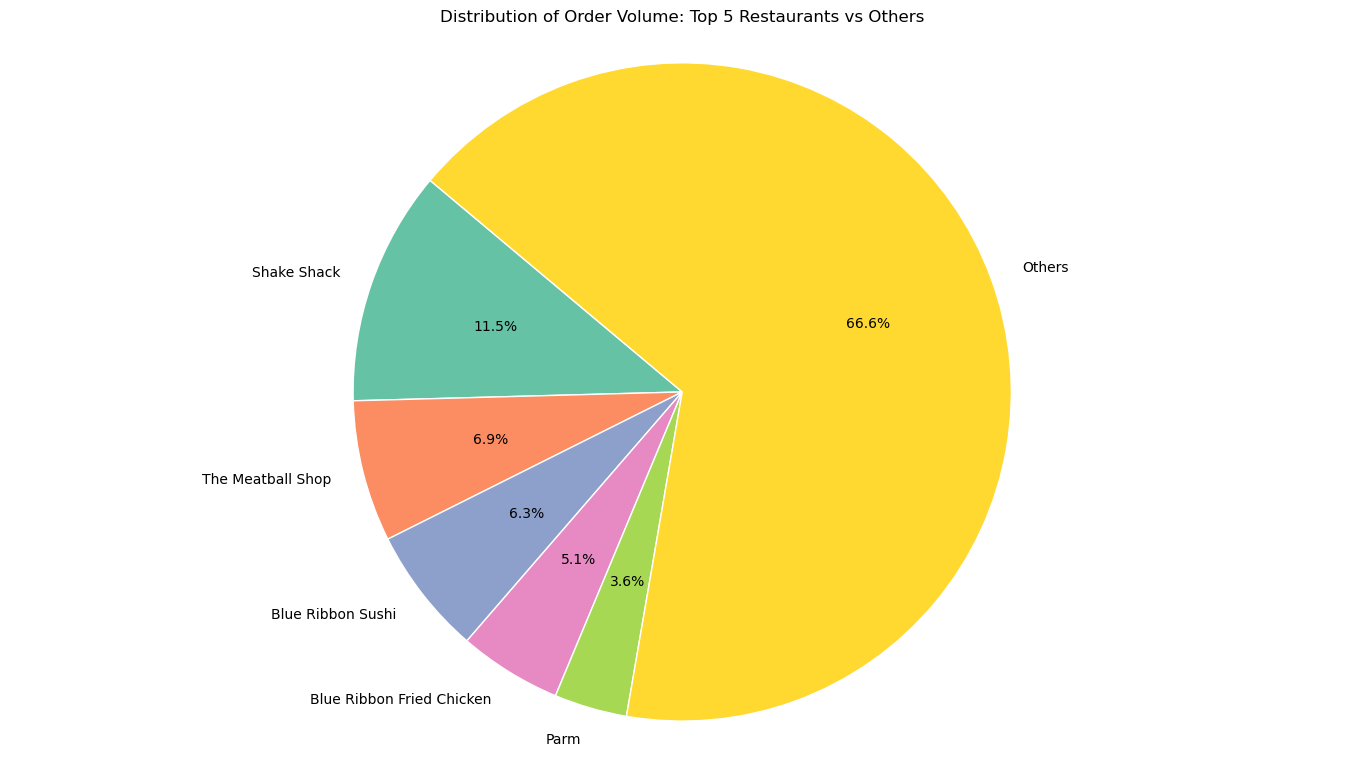

In [96]:
# Identify the top 5 restaurants and calculate their combined percentage
top_five = filtered_df.nlargest(top_n, "percentage")["percentage"].sum()
rest = 100 - top_five

# Prepare data for the pie chart
labels = list(filtered_df.nlargest(top_n, "percentage")["restaurant_name"]) + ["Others"]
sizes = list(filtered_df.nlargest(top_n, "percentage")["percentage"]) + [rest]

# Visualize the distribution in a pie chart of the 'restaurant_name' feature by order volume
plt.figure(figsize=(14, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette_color,
    wedgeprops={"edgecolor": "white"},
)

# Add title and set axis ratio
plt.title(f"Distribution of Order Volume: Top {top_n} Restaurants vs Others")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(pad=2.0)
plt.show()

**Observations:**

- The top 5 restaurants by order volume are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
- Together, these restaurants account for 33.4% of the orders, with Shake Shack alone representing 11.5%.
- The “Others” category, representing the remaining 173 restaurants, comprises 66.6% of the total orders, indicating that the majority of orders are spread among many restaurants outside the top 5.

In [97]:
# Calculate the percentage of restaurants in each order volume category
total = len(filtered_df["restaurant_name"])

ord_lL = len(filtered_df[filtered_df["count"] < 10])
ord_mL = len(filtered_df[(filtered_df["count"] >= 10) & (filtered_df["count"] <= 50)])
ord_uL = len(filtered_df[filtered_df["count"] > 50])

# Create a list of counts
counts = [ord_lL, ord_mL, ord_uL]

# Calculate the percentages of each category using the map function
percentages = list(map(lambda x: round((x / total) * 100, 2), counts))

# Convert to DataFrame
order_volume_df = pd.DataFrame(
    {
        "metric": ["restaurant_order_volume"] * 3,
        "threshold": ["< 10 orders", "10 <= orders <= 50", "> 50 orders"],
        "percentage": percentages,
    }
)

# Display DataFrame
order_volume_df

,metric,threshold,percentage
0,restaurant_order_volume,< 10 orders,76.97
1,restaurant_order_volume,10 <= orders <= 50,19.10
2,restaurant_order_volume,> 50 orders,3.93


**Observations**:
- Nearly 80.0% of restaurants have fewer than 10 orders, highlighting many low-activity establishments.
- Approximately 19% of restaurants receive between 10 and 50 orders.
- Only a small fraction of restaurants, approximately 4.0% receive 50 or more orders.

#### Column | cuisine_type

In [98]:
# Percentages and counts of total orders for the 'cuisine_type' feature
fstats(df, "cuisine_type")

,cuisine_type,count,percentage
0,American,584,30.77
1,Japanese,470,24.76
2,Italian,298,15.70
3,Chinese,215,11.33
4,Mexican,77,4.06
5,Indian,73,3.85
6,Middle Eastern,49,2.58
7,Mediterranean,46,2.42
8,Thai,19,1.00
9,French,18,0.95


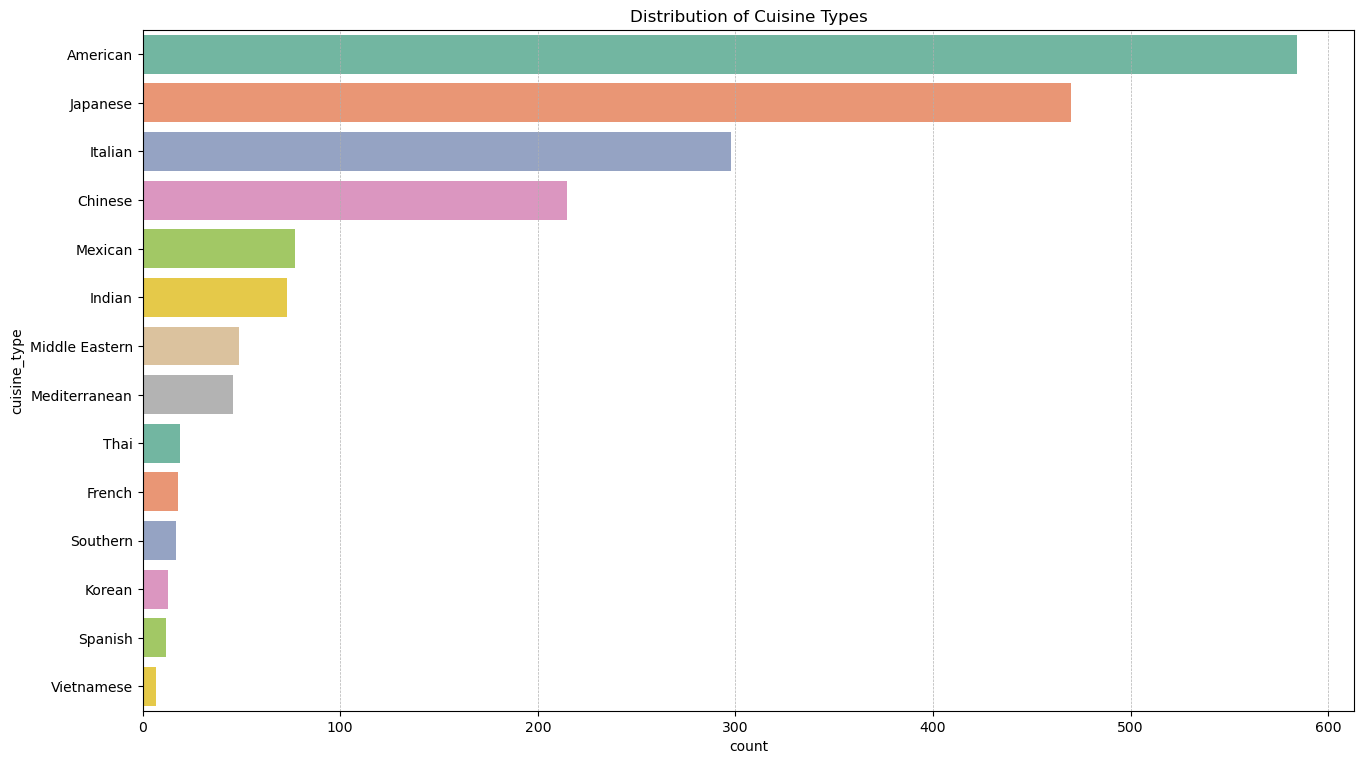

In [99]:
# Visualize the distribution of the 'cuisine_type' feature
plot_count(df, "cuisine_type")

**Observations**:
- The majority of orders are for American, Japanese, and Italian cuisines, representing 30.77%, 24.76%, and 15.70% of orders respectively.
- Together, these top three cuisines account for 71.23% of all available cuisine options.
- Cuisines like Vietnamese and Spanish have the lowest percentages of orders, with 0.37% and 0.63% respectively.

#### Column | day_of_the_week

In [100]:
# Percentages and counts of total orders for the 'day_of_the_week' feature
fstats(df, "day_of_the_week")

,day_of_the_week,count,percentage
0,Weekend,1351,71.18
1,Weekday,547,28.82


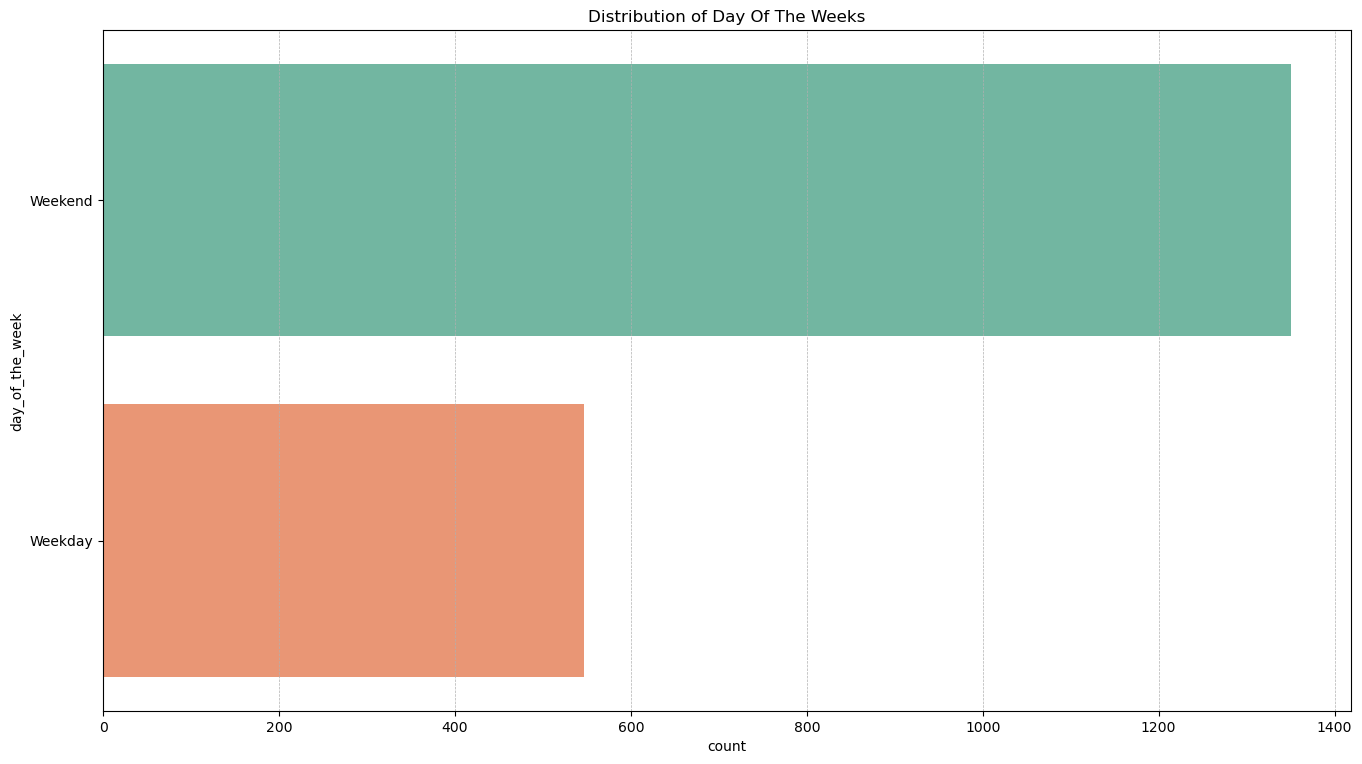

In [101]:
# Visualize the distribution of the 'day_of_the_week' feature
plot_count(df, "day_of_the_week")

**Observations:**
- Most orders are placed during the weekend, accounting for 71.18% of the total.
- Only 28.82% of orders are made on weekdays.

#### Column | rating

In [102]:
# Percentages and counts of total orders for the 'rating' feature
rstats = fstats(df, "rating")

# Display DataFrame
rstats

,rating,count,percentage
0,Not given,736,38.78
1,5,588,30.98
2,4,386,20.34
3,3,188,9.91


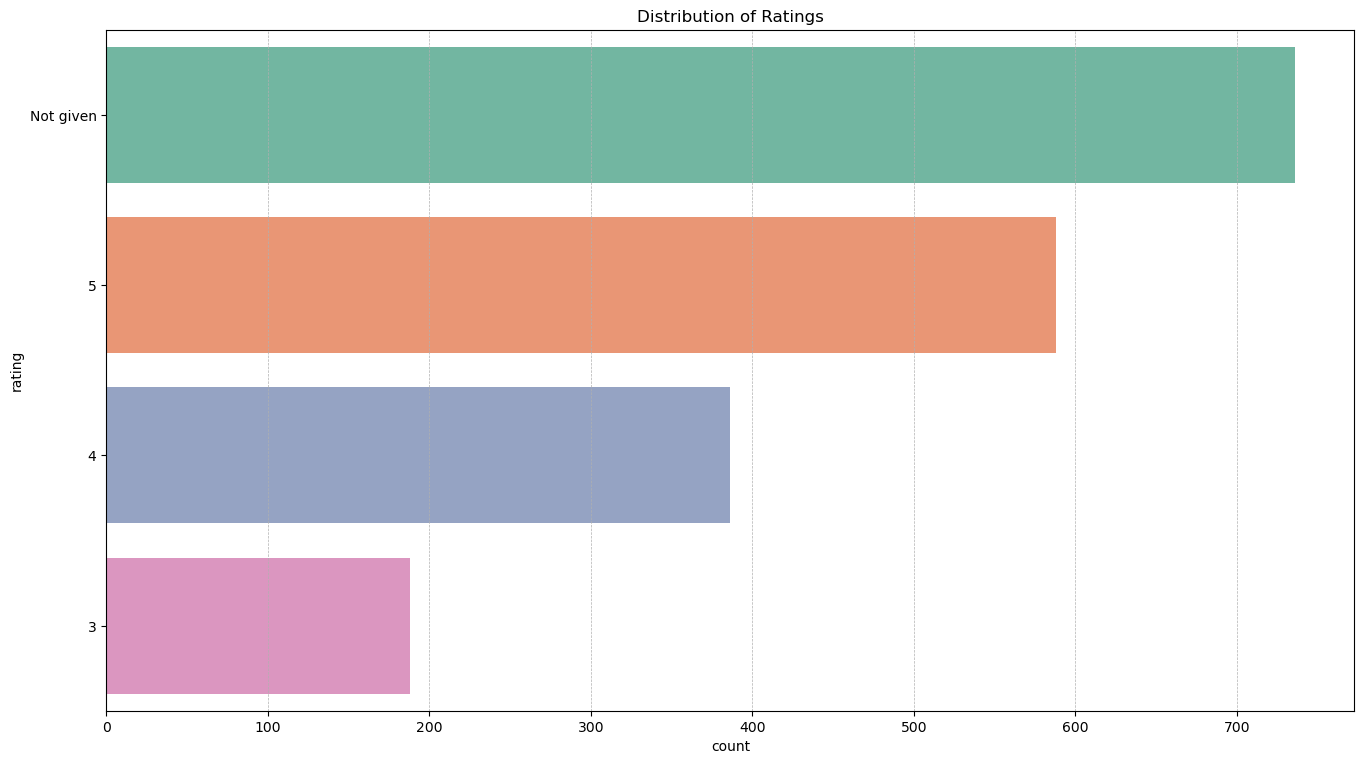

In [103]:
# Visualize the distribution of the 'rating' feature
plot_count(df, "rating")

In [104]:
# Extract percentage for orders without a customer rating
orders_no_rating = rstats.loc[0, "percentage"]

# Calculate Customer Rating Participation Rate (CRPR)
crpr = 100 - orders_no_rating

In [105]:
# Replace 'Not given' with NaN and convert the column type to float64
df["rating"] = df["rating"].replace("Not given", np.nan).astype(np.float64)

# Re-evaluate the DataFrame with the updated column
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,order_completion_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [106]:
# Percentages and counts of total orders for the updated 'rating' feature
rstats = fstats(df, "rating")

# Display DataFrame
rstats

,rating,count,percentage
0,5.0,588,50.60
1,4.0,386,33.22
2,3.0,188,16.18


In [107]:
# Extract percentages for promoters (rating 5) and detractors (rating 3)
promoters = rstats.loc[0, "percentage"]
detractors = rstats.loc[2, "percentage"]

# Calculate Net Promoter Score (NPS)
nps = promoters - detractors

# Convert to DataFrame
metrics_df = metrics_to_dataframe(
    customer_rating_participation_rate=(crpr, "%"),
    net_promoter_score=(nps, "%"),
)

# Display DataFrame
metrics_df

,metric,unit,value
0,customer_rating_participation_rate,%,61.22
1,net_promoter_score,%,34.42


**Observations**:
- **Customer Rating Participation Rate**: 61.22% of orders received ratings, leaving 38.78% unrated, suggesting the need for targeted strategies to improve customer engagement and loyalty for sustaining long-term growth.
- **5-Star Ratings**: 30.98% of the rated orders received a 5-star rating, making it the most common rating.
- **Net Promoter Score (NPS)**: The NPS stands at 34.42%, indicating positive customer sentiment, though the high percentage of missing ratings could skew this interpretation depending on the tendencies of non-raters.
- **Data Update**: Ratings marked as 'Not given' were replaced with 'NaN', and the column’s data type was converted to 'float64'.

### Univariate Analysis of Numerical Columns


#### Column | customer_id

In [108]:
# Calculate the order count for each customer
top_customers = df["customer_id"].value_counts().reset_index()
top_customers.columns = ["customer_id", "count"]

# Calculate the cumulative sum of order counts
top_customers["cum_count"] = top_customers["count"].cumsum()

# Calculate the total number of orders
total_orders = top_customers["count"].sum()

# Calculate the cumulative percentage of orders
top_customers["cum_percentage"] = round(
    (top_customers["cum_count"] / total_orders) * 100, 2
)

# Find the top 5% of customers based on cumulative percentage
top_5_percent_customers = top_customers[top_customers["cum_percentage"] <= 5]

# Display the top 5% of customers based on total order count
top_5_percent_customers[["customer_id", "count", "cum_percentage"]]

,customer_id,count,cum_percentage
0,52832,13,0.68
1,47440,10,1.21
2,83287,9,1.69
3,250494,8,2.11
4,259341,7,2.48
5,82041,7,2.85
6,65009,7,3.21
7,276192,7,3.58
8,97079,6,3.90
9,97991,6,4.21


In [109]:
# Calculate the customer retention rate
crr = top_customers[top_customers["count"] > 1].shape[0] / total_orders * 100

# Convert to DataFrame
metrics_df = metrics_to_dataframe(
    customer_retention_rate=(crr, "%"),
)

# Display DataFrame
metrics_df

,metric,unit,value
0,customer_retention_rate,%,21.92


**Observations**:
- **High-Impact Customers:** Less than 1% of customers account for over 5% of orders, underscoring the impact of a small group of highly active customers on total order volume.
- **Customer Retention Rate**: The customer retention rate stands at 21.92%, indicating that just over one-fifth of customers return to place additional orders. This suggests a need for targeted strategies to improve customer loyalty and increase repeat business, which is crucial for sustaining long-term growth.


#### Column | cost_of_the_order

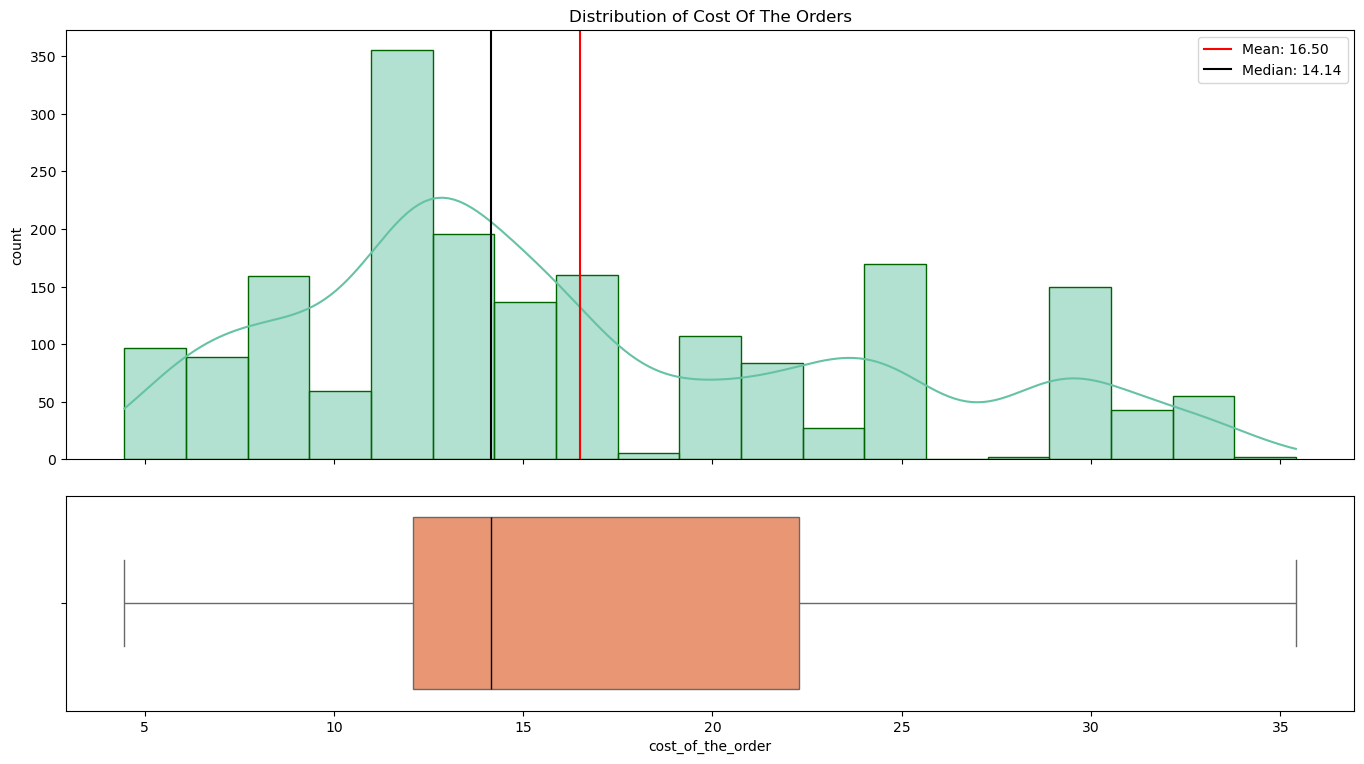

Mean: 16.50, Std: 7.48, Min: 4.47, Max: 35.41, Median: 14.14


In [110]:
# Visualize the distribution of the 'cost_of_the_order' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "cost_of_the_order")

In [111]:
# Calculate the percentage of orders with a cost greater than the threshold
cost_thr = 20
cost_thr = (
    df[df["cost_of_the_order"] > cost_thr].shape[0] / df["cost_of_the_order"].shape[0]
)

# Convert to DataFrame
cost_thr_df = pd.DataFrame(
    {
        "metric": ["cost_of_the_order"],
        "threshold": ["> \\$20"],
        "percentage": round(cost_thr * 100, 2),
    }
)

# Display DataFrame
cost_thr_df

,metric,threshold,percentage
0,cost_of_the_order,> \$20,29.24


**Observations**:

- The distribution is right-skewed with a mean higher than the median and a high standard deviation, indicating wide data variation.
- Order costs range from \\$4.47 to \\$35.41, with an average order value of \\$16.50 and a standard deviation of \\$7.48.
- A significant portion of orders (29.24%) exceeds $20, indicating potential demand and customer willingness to pay for premium options or larger order sizes.

In [112]:
# Calculate the total gross merchandise value (GMV), the average order value (AOV) and order volume
gmv = df["cost_of_the_order"].sum()
ov = df["order_id"].nunique()  # here identical to df.shape[0]
aov = gmv / ov

# Define commission rates (upper and lower limits) and operating cost percentage
uL, lL = 0.25, 0.15  # Commission rates based on order size
net_margin = 0.625  # Assumption of 37.5% operating costs per order


# Calculate total and net revenue for each order
df["total_revenue"] = df["cost_of_the_order"].apply(net_revenue, args=(uL, lL)).round(2)
df["net_revenue"] = (df["total_revenue"] * net_margin).round(2)

# Aggregate total revenue, net revenue across all orders, and compute profit margin
total_rev = df["total_revenue"].sum()
net_rev = df["net_revenue"].sum()
profit_margin = net_rev / total_rev * 100

# Convert to DataFrame
metrics_df = metrics_to_dataframe(
    gross_merchandise_value=(gmv, "\\$"),
    average_order_value=(aov, "\\$"),
    order_volume=(ov, "-"),
    total_rev=(total_rev, "\\$"),
    net_rev=(net_rev, "\\$"),
    profit_margin=(profit_margin, "%"),
)

# Display DataFrame
metrics_df

,metric,unit,value
0,gross_merchandise_value,\$,31314.82
1,average_order_value,\$,16.50
2,order_volume,-,1898.00
3,total_rev,\$,6166.40
4,net_rev,\$,3853.06
5,profit_margin,%,62.48


**Observations**:
- **Commision Rate**: The company applies a take rate of 25% for orders over \\$20 and 15% for orders between \\$5 and \\$20, with no charge for orders under \\$5.
- **Gross Merchandise Value (GMV)**: The total sales volume is \\$31,314.82, indicating strong overall sales performance.
- **Average Order Value (AOV)**: \\$16.50, reflecting the typical spending per order, suggesting customers are making moderately priced purchases.
- **Order Volume**: A total of 1,898 orders were processed.
- **Total Revenue**: The company generated \\$6,166.40 from all orders, demonstrating the effectiveness of the tiered take rate structure.
- **Net Revenue**: After accounting for operating costs, the company’s net revenue is \\$3,853.06, indicating profitability.
- **Profit Margin**: With operational costs estimated at 37.5% of total revenue, the profit margin is approximately 62.5%, reflecting strong financial health.

#### Column | food_preparation_time

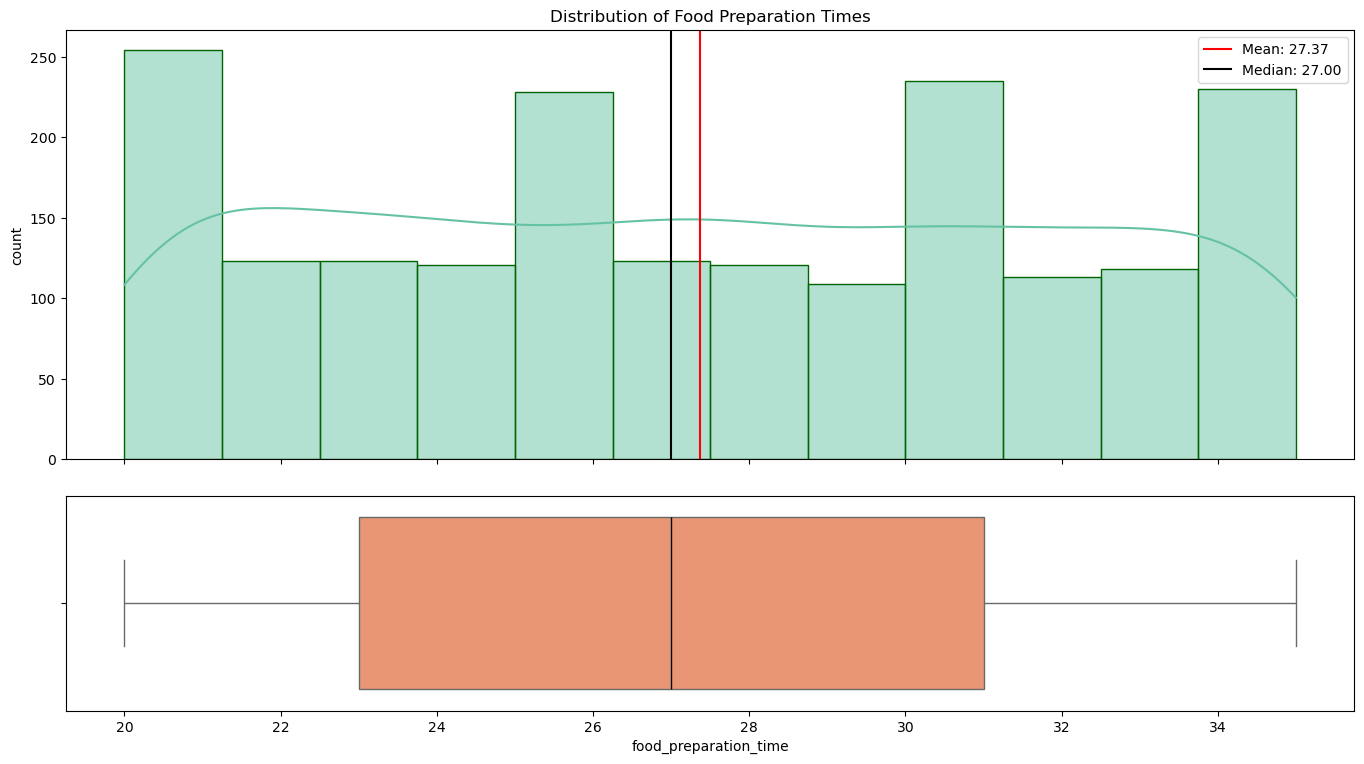

Mean: 27.37, Std: 4.63, Min: 20.00, Max: 35.00, Median: 27.00


In [113]:
# Visualize the distribution of the 'food_preparation_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "food_preparation_time")

**Observations**:
- The distribution is slightly right-skewed with a mean higher than the median.
- Food preparation times range from 20.0 to 35.0 minutes, with an average time of 27.37 minutes and a standard deviation of approximately 4.63 minutes.

#### Column | delivery_time

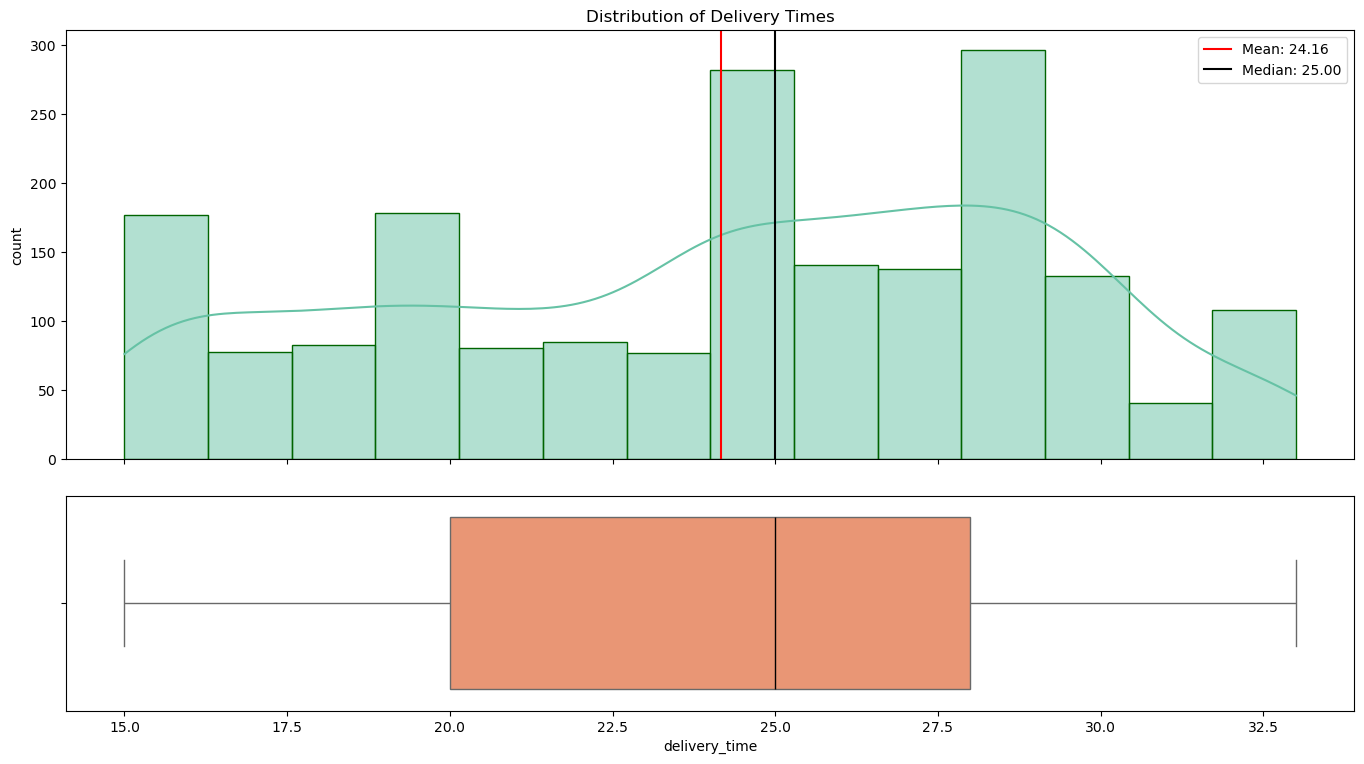

Mean: 24.16, Std: 4.97, Min: 15.00, Max: 33.00, Median: 25.00


In [114]:
# Visualize the distribution of the 'delivery_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "delivery_time")

**Observations**:
- The distribution is slightly left-skewed, with the mean lower than the median.
- Delivery times range from 15.0 to 33.0 minutes, with an average time of 24.16 minutes and a standard deviation of approximately 4.97 minutes.

#### Column | order_completion_time

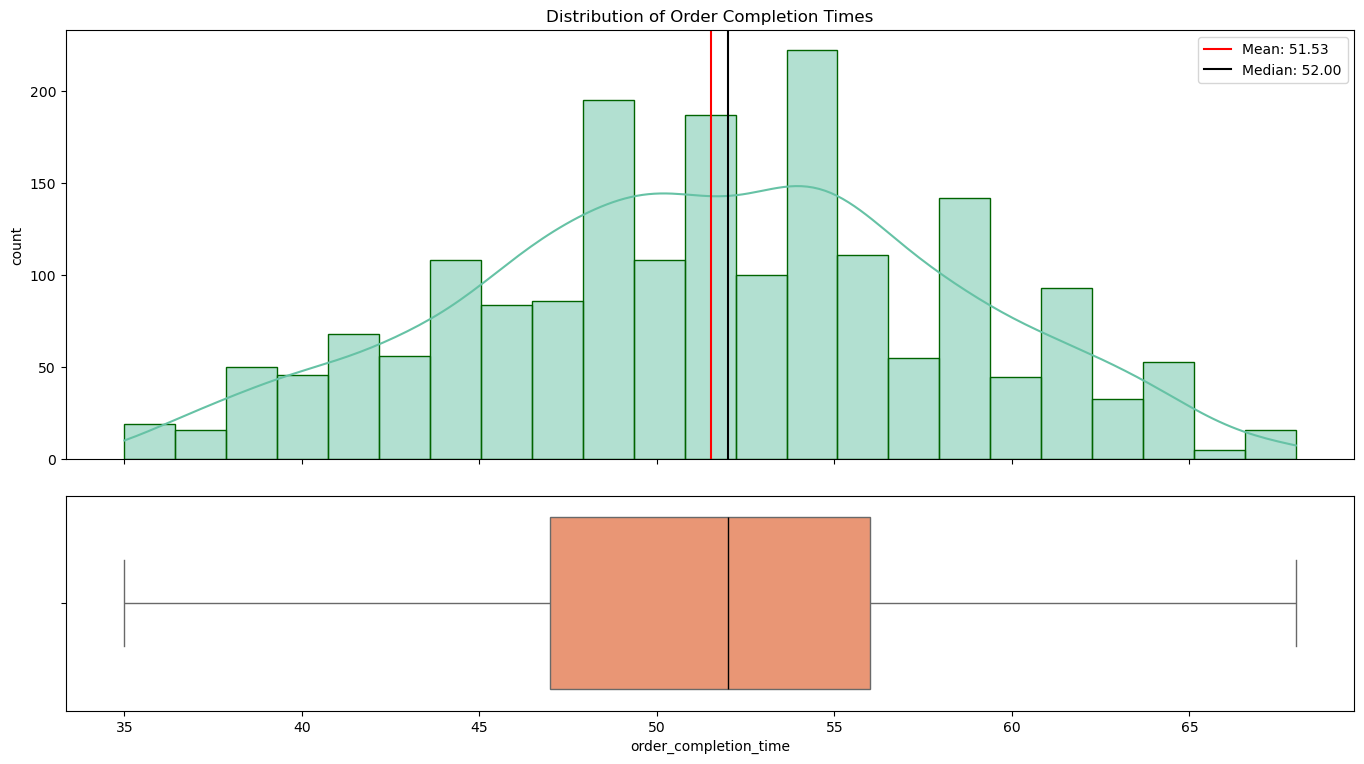

Mean: 51.53, Std: 6.83, Min: 35.00, Max: 68.00, Median: 52.00


In [115]:
# Visualize the distribution of the 'order_completion_time' feature, identify potential outliers (IQR) and genertate key summary statistics
plot_histbox(df, "order_completion_time")

In [116]:
# Filter data by the specified column and threshold
filtered_df = df[df["order_completion_time"] > 60]

# Percentage of orders with an order completion time greater 60 minutes
orders_thr = round(filtered_df.shape[0] / df.shape[0] * 100, 2)

# Convert to DataFrame
orders_thr_df = pd.DataFrame(
    {
        "metric": ["order_completion_time"],
        "threshold": ["> 60 minutes"],
        "percentage": [orders_thr],
    }
)

# Display DataFrame
orders_thr_df

,metric,threshold,percentage
0,order_completion_time,> 60 minutes,10.54


**Observations**:
- The distribution is slightly left-skewed, with the mean lower than the median.
- Order completion time, the sum of food preparation and delivery time, ranges from 35.0 to 68.0 minutes, with an average time of 51.53 minutes and a standard deviation of approximately 6.83 minutes.
- 10.54% of orders take over 60 minutes from the time they are placed via the food aggregator platform.

### Multivariate Analysis

#### Columns | cuisine_type, day_of_the_week

In [117]:
# Most popular cuisine on weekdays
compute_stats(df, "cuisine_type", "day_of_the_week", "Weekday")

,cuisine_type,count_weekday,percentage_weekday
0,American,169,30.90
1,Japanese,135,24.68
2,Italian,91,16.64
3,Chinese,52,9.51
4,Mexican,24,4.39
5,Indian,24,4.39
6,Middle Eastern,17,3.11
7,Mediterranean,14,2.56
8,Southern,6,1.10
9,French,5,0.91


In [118]:
# Most popular cuisine on weekends
compute_stats(df, "cuisine_type", "day_of_the_week", "Weekend")

,cuisine_type,count_weekend,percentage_weekend
0,American,415,30.72
1,Japanese,335,24.80
2,Italian,207,15.32
3,Chinese,163,12.07
4,Mexican,53,3.92
5,Indian,49,3.63
6,Mediterranean,32,2.37
7,Middle Eastern,32,2.37
8,Thai,15,1.11
9,French,13,0.96


**Observations:**
- The most popular cuisine on weekdays is also American, making up 33.98% of orders, followed by Japanese at 27.13%, and Italian at 18.28%, with the top three cuisines comprising 79.39% of orders.
- The most popular cuisine on weekends is American, constituting 30.72% of orders, followed by Japanese at 24.8%, and Italian at 15.32%, with the top three cuisines making up 70.84% of orders.

#### Columns | cuisine_type, cost_of_the_order

In [119]:
# Set key feature
key_feature = "cost_of_the_order"

# Calculate and display average and standard deviation of key feature per cuisine type
avg_cost_per_cuisine = fstatsmean(df, "cuisine_type", key_feature)

# Rename column names
avg_cost_per_cuisine.columns = [
    "cuisine_type",
    f"average_{key_feature}",
    f"std_{key_feature}",
]

# Display DataFrame
avg_cost_per_cuisine.sort_values(
    ascending=False, by=f"average_{key_feature}"
).reset_index(drop=True)

,cuisine_type,average_cost_of_the_order,std_cost_of_the_order
0,French,19.79,6.51
1,Southern,19.30,7.97
2,Thai,19.21,7.58
3,Spanish,18.99,6.66
4,Middle Eastern,18.82,8.09
5,Mexican,16.93,7.56
6,Indian,16.92,7.90
7,Italian,16.42,7.27
8,American,16.32,7.46
9,Chinese,16.31,7.63


**Observations**:
- The average cost ranges from approximately \\$12.88 for Vietnamese cuisine to \\$19.79 for French cuisine.

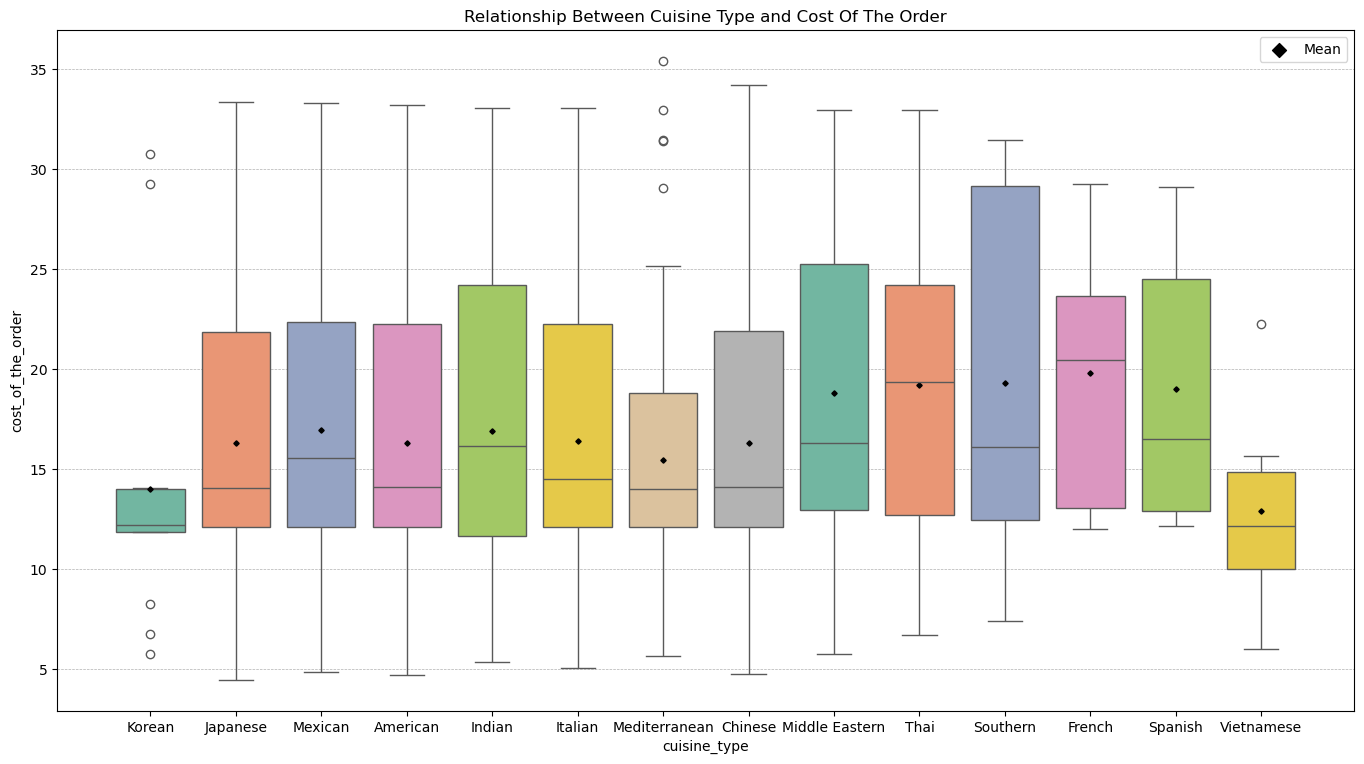

In [120]:
# Visualize the relationship between the features 'cuisine_types' and 'cost_of_the_order' using boxplots and point plots
plot_boxplot_and_pointplot(df, "cuisine_type", "cost_of_the_order")

**Observations**:
- Korean and Vietnamese cuisines have the lowest median order costs and the least variability, with a small number of outliers.
- Southern cuisine exhibits the highest overall variability in order costs with several outliers.
- The top 5 cuisines (American, Japanese, Italian, Chinese, and Mexican/Indian) show similar trends, with median costs clustered around \\$14-\\$17.
- Skewness in order costs may reflect factors such as menu pricing strategies, ingredient costs, and restaurant location

#### Columns | cuisine_type, order_completion_time

In [121]:
# Set key feature
key_feature = "order_completion_time"

# Calculate and display average and standard deviation of key feature per cuisine type
avg_cost_per_cuisine = fstatsmean(df, "cuisine_type", key_feature)

# Rename column names
avg_cost_per_cuisine.columns = [
    "cuisine_type",
    f"average_{key_feature}",
    f"std_{key_feature}",
]

# Display DataFrame
avg_cost_per_cuisine.sort_values(
    ascending=False, by=f"average_{key_feature}"
).reset_index(drop=True)

,cuisine_type,average_order_completion_time,std_order_completion_time
0,French,52.22,6.03
1,Italian,52.05,6.76
2,Vietnamese,51.86,4.74
3,Japanese,51.64,6.99
4,American,51.63,6.62
5,Southern,51.41,8.60
6,Chinese,51.37,7.36
7,Indian,51.19,6.52
8,Mexican,51.12,5.89
9,Middle Eastern,50.76,7.22


**Observations**:
- The average order completion time ranges from approximately 46.38 minutes for Korean cuisine to 52.2 minutes for French cuisine.

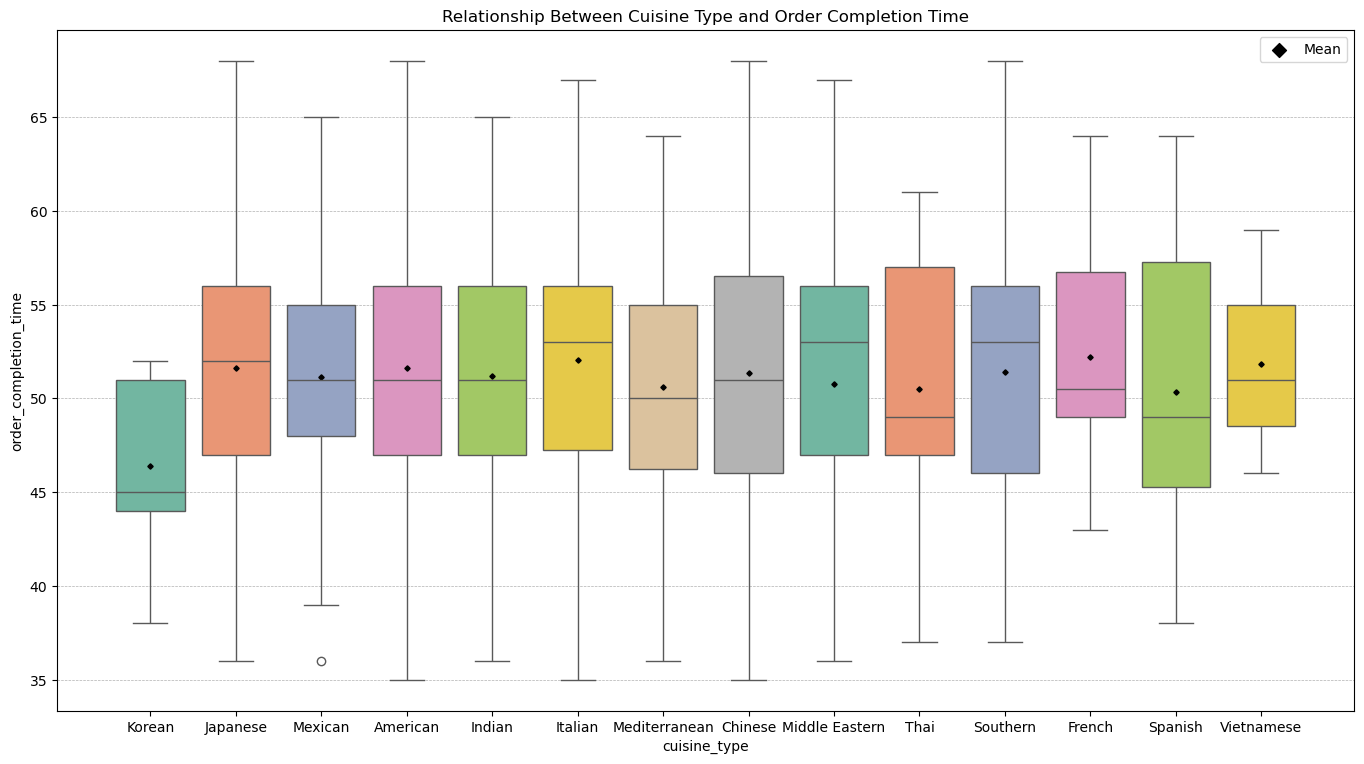

In [122]:
# Visualize the relationship between the features 'cuisine_types' and 'order_completion_time' using boxplots and point plots
plot_boxplot_and_pointplot(df, "cuisine_type", "order_completion_time")

**Observations**:
- Korean cuisine has the lowest median order completion time and the least variability.
- Chinese, American and Southern cuisine exhibit higher variability in order completion times, with a wider interquartile range compared to other cuisines.
- The top 5 cuisines (American, Japanese, Italian, Chinese, and Mexican/Indian), show similar trends with median order completion times clustered around 50-55 minutes.
- Skewness may indicate external influences like restaurant efficiency, preparation time, and delivery logistics.

#### Columns | cuisine_type, rating

In [123]:
# Calculate the number of ratings and the mean rating for each cuisine type
cuisine_ratings = df.groupby("cuisine_type")["rating"].agg(["count", "mean"]).round(2)

# Rename columns for clarity
cuisine_ratings.columns = ["count_rating", "mean_rating"]

# Sort the DataFrame by mean_rating in descending order and reset the index
cuisine_ratings = cuisine_ratings.sort_values(by="mean_rating", ascending=False)

# Display DataFrame
cuisine_ratings.reset_index()

,cuisine_type,count_rating,mean_rating
0,Spanish,6,4.83
1,Thai,9,4.67
2,Indian,50,4.54
3,Mexican,48,4.42
4,Japanese,273,4.37
5,Italian,172,4.36
6,Chinese,133,4.34
7,Southern,13,4.31
8,American,368,4.30
9,French,10,4.30


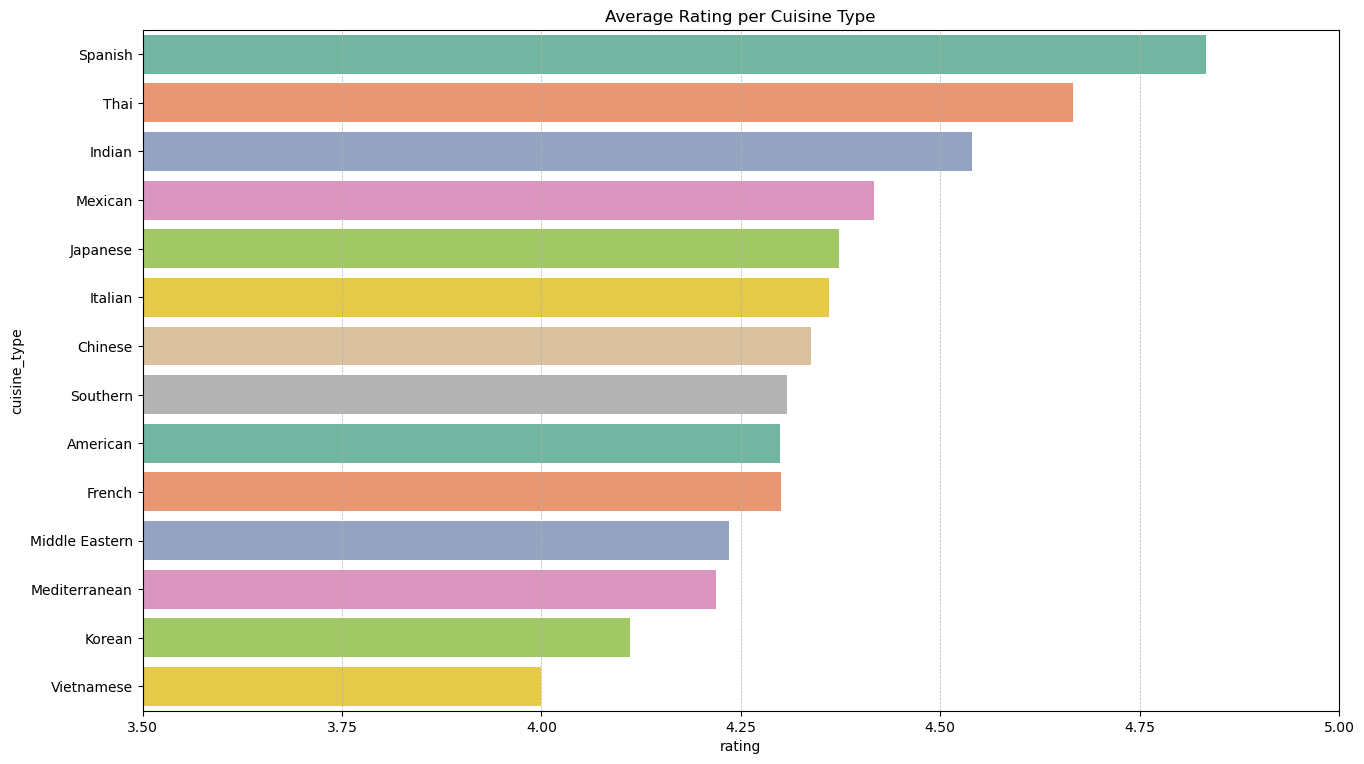

In [124]:
# Visualize the distribution of the average rating per cuisine type
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df,
    y="cuisine_type",
    x="rating",
    hue="cuisine_type",
    ci=False,
    order=cuisine_ratings.index,
    hue_order=cuisine_ratings.index,
    palette=palette_color,
)

# Set x-axis limits and ticks
plt.xlim(3.5, 5)
plt.xticks(np.arange(3.5, 5.25, 0.25))

# Add title and grid lines
plt.title("Average Rating per Cuisine Type")
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.tight_layout(pad=2.0)
plt.show()

**Observations**:
- Spanish cuisine has the highest mean rating at 4.83, while Vietnamese has the lowest at 4.00.
- Cuisines with higher ratings, such as Spanish and Thai, have relatively low counts (6 and 9, respectively), indicating higher uncertainty in their ratings.
- All cuisines with rating counts over 100 show similar average ratings, 4.30 to 4.37, suggesting consistent customer satisfaction among popular choices.

#### Columns | delivery_time, day_of_the_week, cuisine_type

In [125]:
filtered_df = df.groupby(["day_of_the_week", "cuisine_type"])["delivery_time"]

# Group by and calculate mean, std, and count
fstats = filtered_df.agg(["mean", "std", "count"]).round(2).reset_index()

# Replace NaN values in 'std' with 0
fstats["std"].fillna(0, inplace=True)

# Calculate the standard error and the confidence intervals
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

fstats["sem"] = (fstats["std"] / np.sqrt(fstats["count"])).round(2)
fstats["ci"] = (z_score * fstats["sem"]).round(2)

# Separate data for weekdays and weekends
weekday_data = fstats[fstats["day_of_the_week"] == "Weekday"].reset_index(drop=True)
weekend_data = fstats[fstats["day_of_the_week"] == "Weekend"].reset_index(drop=True)

# Display the first 5 rows of each DataFrame
display(weekday_data.head(5))
display(weekend_data.head(5))

,day_of_the_week,cuisine_type,mean,std,count,sem,ci
0,Weekday,American,28.25,2.85,169,0.22,0.43
1,Weekday,Chinese,28.83,2.98,52,0.41,0.80
2,Weekday,French,27.20,1.92,5,0.86,1.69
3,Weekday,Indian,27.62,2.79,24,0.57,1.12
4,Weekday,Italian,28.80,2.88,91,0.30,0.59


,day_of_the_week,cuisine_type,mean,std,count,sem,ci
0,Weekend,American,22.54,4.49,415,0.22,0.43
1,Weekend,Chinese,22.27,4.40,163,0.34,0.67
2,Weekend,French,24.62,4.07,13,1.13,2.21
3,Weekend,Indian,22.35,5.02,49,0.72,1.41
4,Weekend,Italian,22.71,4.86,207,0.34,0.67


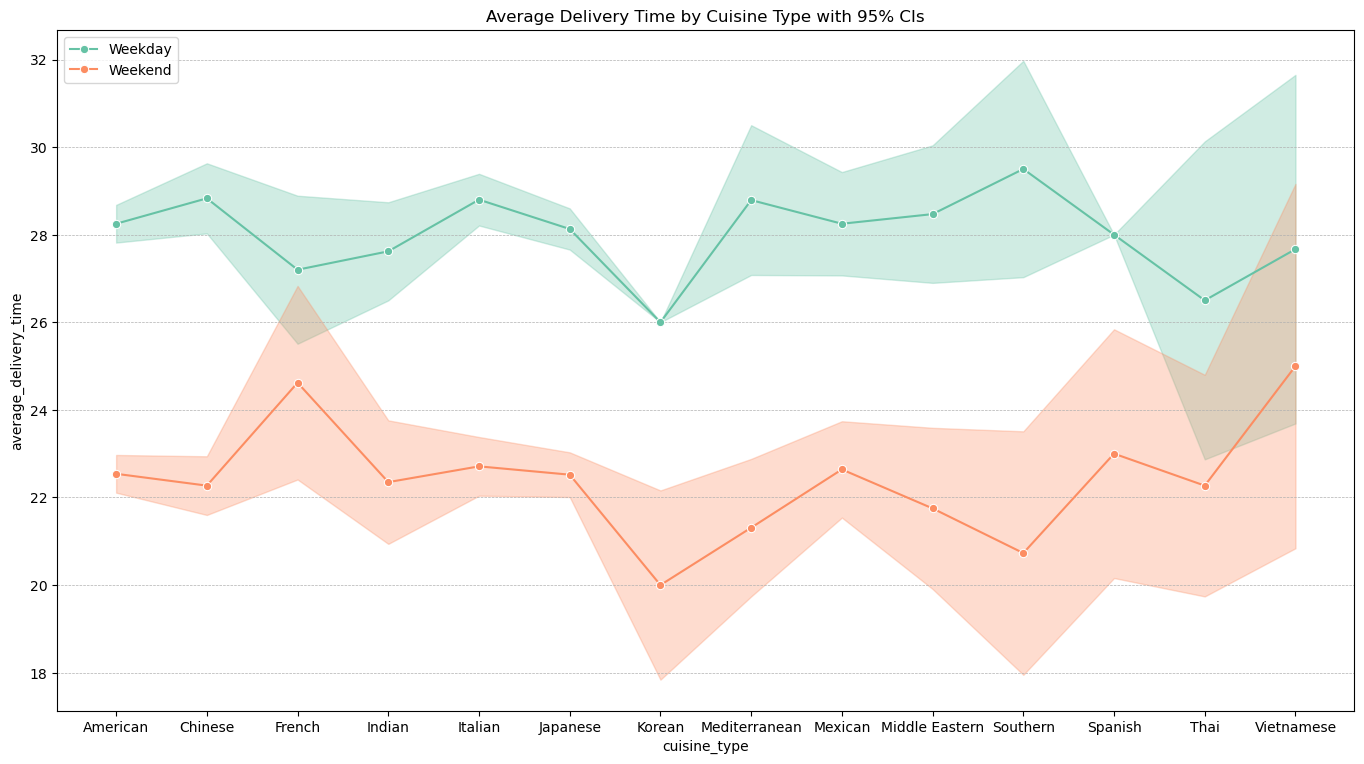

In [126]:
# Initiate figure
plt.figure(figsize=(14, 8))

# Weekday lineplot
sns.lineplot(
    data=weekday_data,
    x="cuisine_type",
    y="mean",
    marker="o",
    label="Weekday",
    color=palette_color[0],
)
plt.fill_between(
    weekday_data["cuisine_type"],
    weekday_data["mean"] - weekday_data["ci"],
    weekday_data["mean"] + weekday_data["ci"],
    color=palette_color[0],
    alpha=0.3,
)

# Weekend lineplot
sns.lineplot(
    data=weekend_data,
    x="cuisine_type",
    y="mean",
    marker="o",
    label="Weekend",
    color=palette_color[1],
)
plt.fill_between(
    weekend_data["cuisine_type"],
    weekend_data["mean"] - weekend_data["ci"],
    weekend_data["mean"] + weekend_data["ci"],
    color=palette_color[1],
    alpha=0.3,
)

# Add legend, title, label and ticks
plt.legend(loc="upper left")
plt.title(f"Average Delivery Time by Cuisine Type with 95% CIs")
plt.ylabel("average_delivery_time")
plt.xticks(rotation=0)
plt.tight_layout(pad=2.0)

plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.show()

**Observations**:
- **Faster Weekend Deliveries**: Average delivery times on weekends are significantly lower than on weekdays for nearly all cuisine types, indicating more efficient weekend operations.
- **High Consistency on Weekends**: Confidence intervals (CIs) for weekend delivery times are generally narrower than those for weekdays, especially for Indian, Chinese, and Mexican cuisines, suggesting more consistent weekend deliveries.
- **Delivery Time Range**: On weekends, the minimum average delivery time is for Korean cuisine, 20 minutes, while the maximum is for Vietnamese cuisine, 25 minutes. On weekdays, the minimum average delivery time is again for Korean cuisine, 26 minutes, while the maximum is for Southern cuisine, 29.5 minutes.
- **High Variability**: Cuisines such as French, Thai, Vietnamese, and Southern show higher variability in average delivery times on both weekdays and weekends, indicated by wider CIs, possibly pointing to inconsistencies in preparation or delivery processes for these cuisines.

#### Columns | restaurant_name, food_preparation_time, delivery_time, order_completion_time

In [127]:
# Top 5 and bottom 5 restaurants in terms of average food preparation time with a threshold of at least 10 deliveries
top_and_bottom_restaurants(
    data=df, filter_feature="food_preparation_time", delivery_threshold=10
)

,restaurant_name,average_food_preparation_time
0,Cafe Mogador,25.28
1,Five Guys Burgers and Fries,25.62
2,Westville Hudson,25.67
3,Chipotle Mexican Grill,26.00
4,The Smile,26.11
35,J. G. Melon,28.47
36,Blue Ribbon Sushi Izakaya,28.72
37,Otto Enoteca Pizzeria,29.00
38,Sushi Samba,29.09
39,S'MAC,29.42


In [128]:
# Top 5 and bottom 5 restaurants in terms of average delivery time with a threshold of at least 10 deliveries
top_and_bottom_restaurants(
    data=df, filter_feature="delivery_time", delivery_threshold=10
)

,restaurant_name,average_delivery_time
0,Westville Hudson,21.73
1,Sushi of Gari,21.94
2,Hill Country Fried Chicken,22.64
3,Jack's Wife Freda,22.72
4,Otto Enoteca Pizzeria,22.92
35,J. G. Melon,25.00
36,Momoya,25.13
37,Parm,25.50
38,Cafe Habana,25.56
39,Sushi of Gari 46,25.97


In [129]:
# Top 5 and bottom 5 restaurants in terms of average order completion time with a threshold of at least 10 deliveries
top_and_bottom_restaurants(
    data=df, filter_feature="order_completion_time", delivery_threshold=10
)

,restaurant_name,average_order_completion_time
0,Westville Hudson,47.40
1,Cafe Mogador,48.22
2,Five Guys Burgers and Fries,49.03
3,Blue Ribbon Sushi Bar & Grill,49.70
4,Chipotle Mexican Grill,49.87
35,Parm,52.81
36,J. G. Melon,53.47
37,Sushi of Gari 46,53.51
38,Sushi Samba,53.73
39,S'MAC,54.17


**Observations**:
- **Threshold**: Implementing a threshold of at least 10 deliveries ensures the data is representative and reduces the impact of outliers, resulting in more precise and actionable insights.  A total of 40 restaurants meet this threshold.
- **Key Trend**: Restaurants excelling in order completion time typically also perform well in both food preparation and delivery times, indicating well-rounded operational efficiency.
- **Overall Top Performer**: Westville Hudson leads with the shortest average order completion time (47.40 minutes), followed closely by Cafe Mogador (48.22 minutes) and Five Guys Burgers and Fries (49.03 minutes).
- **Performance Gap**: The last 5 restaurants exhibit significantly longer average order completion, food preparation, and delivery times. Notably, despite being one of the top 5 restaurants based on total orders, Parm is found in this lower-performing group.

#### Columns | restaurant_name, cost_of_the_order

In [130]:
# Top 5 restaurants in terms of gross merchandise value (GMV) per restaurant
gmv_restaurant = (
    df.groupby("restaurant_name")["cost_of_the_order"]
    .sum()
    .sort_values(ascending=False)
    .round(2)
    .reset_index()
)
gmv_restaurant.rename(
    columns={"cost_of_the_order": "gross_merchandise_value"}, inplace=True
)
gmv_restaurant.head(5)

,restaurant_name,gross_merchandise_value
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76


**Observation:**
- **Gross Merchandise Value (GMV)**: The top 5 restaurants by GMV are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, with Shake Shack leading significantly at \\$3,579.53.

#### Columns | restaurant_name, rating

In [131]:
# Set thresholds for the number of ratings and average rating score
r_cnt_th = 25
r_avg_th = 4

# Group and filter by specified columns
rating_stats = df.groupby("restaurant_name")["rating"]

# Calculate rating count and average rating
rating_stats = rating_stats.agg(["count", "mean"]).round(2).reset_index()

# Rename columns
rating_stats.columns = ["restaurant_name", "count_rating", "average_rating"]

# Filter based on the given criteria
eligible_restaurants = rating_stats[
    (rating_stats["count_rating"] > r_cnt_th)
    & (rating_stats["average_rating"] > r_avg_th)
]

# Sort and reset index
eligible_restaurants = eligible_restaurants.sort_values(
    ascending=False, by="average_rating"
).reset_index(drop=True)

# Display DataFrame | Restaurants that fulfill the criteria
eligible_restaurants

,restaurant_name,count_rating,average_rating
0,The Meatball Shop,84,4.51
1,TAO,28,4.36
2,Blue Ribbon Fried Chicken,64,4.33
3,Shake Shack,133,4.28
4,RedFarm Broadway,41,4.24
5,Blue Ribbon Sushi,73,4.22
6,RedFarm Hudson,34,4.18
7,Parm,39,4.13


**Observations**:
- Only 8 restaurants, representing 3.9%, meet the criteria of having over 25 ratings and an average rating greater than 4.
- These selected restaurants maintain high average ratings, indicating strong customer satisfaction among popular establishments.

#### Columns | day_of_the_week, cost_of_the_order, food_preparation_time, delivery_time, order_completion_time

In [132]:
# List of key numerical features of interest
key_features = [
    "cost_of_the_order",
    "food_preparation_time",
    "delivery_time",
    "order_completion_time",
]

# Calculate and display average and standard deviation of features per day of the week
fstatsmean(df, "day_of_the_week", key_features)

day_of_the_week cost_of_the_order       food_preparation_time        \
                               mean   std                  mean   std   
0         Weekday             16.31  7.48                 27.21  4.71   
1         Weekend             16.57  7.49                 27.44  4.60   

  delivery_time       order_completion_time        
           mean   std                  mean   std  
0         28.34  2.89                 55.55  5.57  
1         22.47  4.63                 49.91  6.62

**Observations**:
- **Cost and Food Preparation:** The average values remain stable with a slight increase on weekends, indicating consistent demand and operational efficiency.
- **Delivery and Completion Times:** Improved on weekends, suggesting improved in delivery logistics, overall operations and traffic conditions. Average delivery times are 26.1% longer and more variable on weekdays.

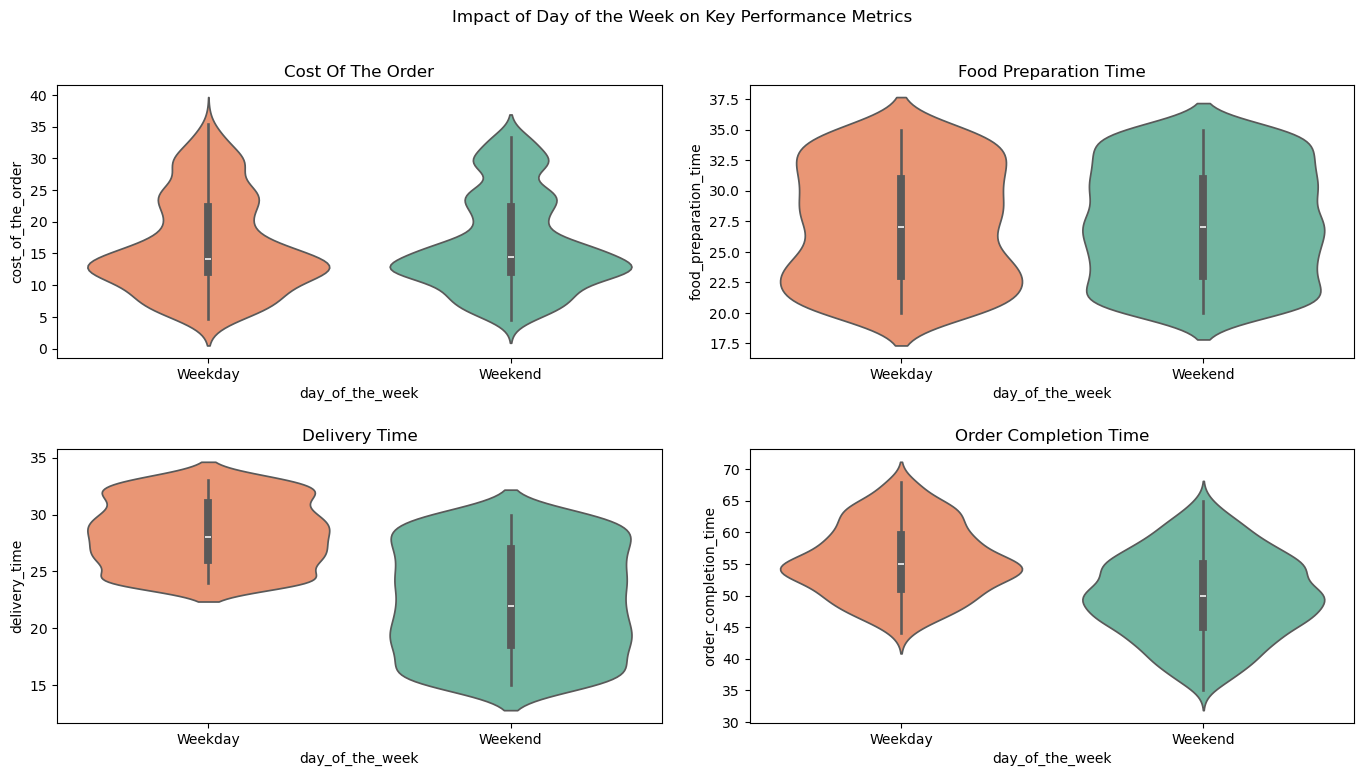

In [133]:
# Initiate subplots and set title
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Impact of Day of the Week on Key Performance Metrics")

# Plot violin plots for each feature
for index, feature in enumerate(key_features):
    row = index // 2
    col = index % 2
    sns.violinplot(
        data=df,
        x="day_of_the_week",
        y=feature,
        hue="day_of_the_week",
        order=["Weekday", "Weekend"],
        ax=axs[row, col],
        palette=palette_color,
    )

    # Add title for each subplot
    formatted_title = feature.replace("_", " ").title()
    axs[row, col].set_title(formatted_title)

plt.subplots_adjust(top=0.90)
plt.tight_layout(pad=2.0)
plt.show()

**Observations**:
- **Cost of the Order**: Orders tend to have higher variability in cost on weekends, while weekdays see more consistent and stable order costs.
- **Food Preparation Time**: Food preparation times are generally longer and more variable on weekends compared to the shorter and more consistent times during weekdays.
- **Delivery Time**: Delivery times are longer and more variable on weekends, whereas they are shorter and more consistent on weekdays.
- **Order Completion Time**: Overall order completion times are higher and more spread out on weekends, in contrast to the more consistent and quicker completions during weekdays.

#### Columns | cost_of_the_order, food_preparation_time, delivery_time, order_completion_time, rating

In [134]:
# Select relevant features
relevant_features = num_cols[2:] + ["rating"]

# Calculate correlation matrix for numerical features
corr = df[relevant_features].corr().round(2)

# Convert the correlation matrix into a DataFrame and rename the 'index' colum
corr_df = corr.reset_index().rename(columns={"index": "numerical_feature"})

# Display the correlation matrix
display(corr_df)

,numerical_feature,cost_of_the_order,food_preparation_time,delivery_time,order_completion_time,rating
0,cost_of_the_order,1.00,0.04,-0.03,0.01,0.03
1,food_preparation_time,0.04,1.00,0.01,0.69,-0.01
2,delivery_time,-0.03,0.01,1.00,0.74,-0.01
3,order_completion_time,0.01,0.69,0.74,1.00,-0.01
4,rating,0.03,-0.01,-0.01,-0.01,1.00


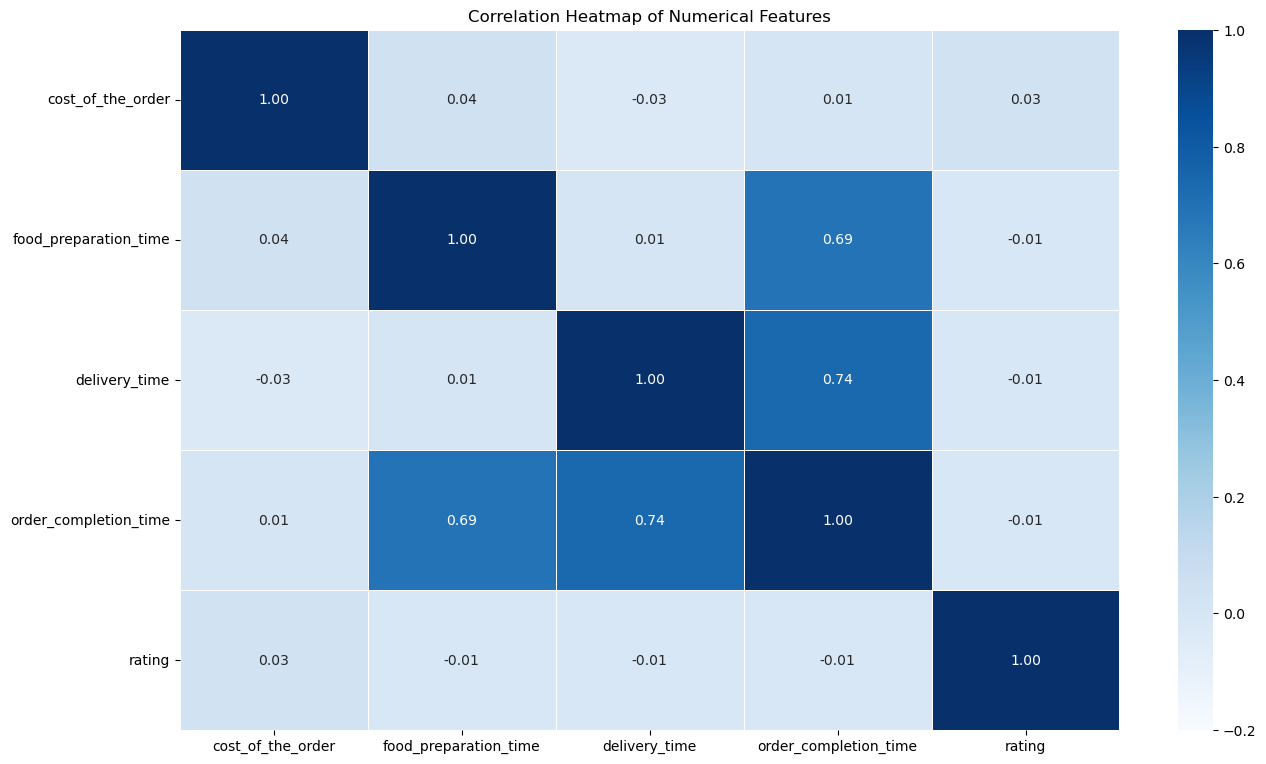

In [135]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f", vmin=-0.2, cmap="Blues")

# Add title
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout(pad=2.0)
plt.show()

**Observations**:
- **Order Completion and Delivery Time**: Strong positive correlation (0.74), indicating that longer delivery times significantly extend the overall order completion time.
- **Order Completion and Food Preparation Time**: Moderate positive correlation (0.69), suggesting that longer preparation times also contribute to longer completion times.
- **Food Preparation and Delivery Time**: No correlation, indicating that these processes operate independently.
- **Cost Independence**: Very weak correlations with other features, indicating its relative independence.
- **Rating Independence**: No significant correlation with other metrics, indicating customer satisfaction remains high despite variations in those metrics.

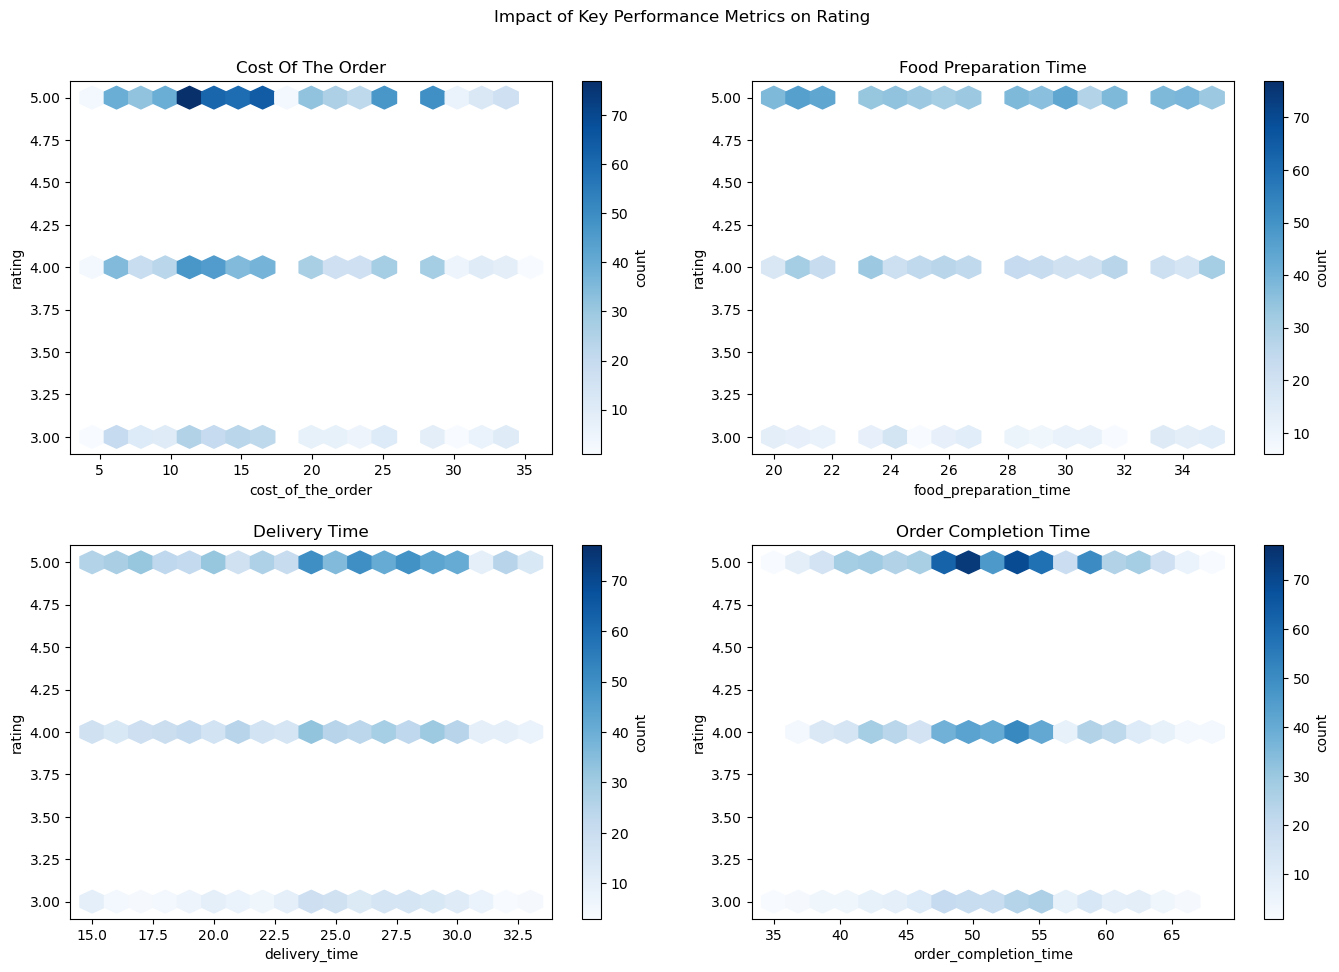

In [136]:
# Select relevant features
key_features = relevant_features[:-1]

# Create hexbin plots and store the counts to find the global max
hexbin_plots = []
for feature in key_features:
    hb = plt.hexbin(df[feature], df["rating"], gridsize=18, cmap="Blues", mincnt=1)
    hexbin_plots.append(hb)
    plt.close()

# Calculate the global maximum count from all hexbin plots
max_count = max([hb.get_array().max() for hb in hexbin_plots])

# Initiate subplots and set title
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Impact of Key Performance Metrics on Rating")

# Plot hexbin plots for each feature
for index, feature in enumerate(key_features):
    row = index // 2
    col = index % 2
    hb = axs[row, col].hexbin(
        df[feature], df["rating"], gridsize=18, cmap="Blues", mincnt=1, vmax=max_count
    )
    fig.colorbar(hb, ax=axs[row, col], label="count")

    # Add title and labels for each subplot
    formatted_title = feature.replace("_", " ").title()
    axs[row, col].set_title(formatted_title)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel("rating")

plt.subplots_adjust(top=0.90)
plt.tight_layout(pad=2.0)
plt.show()

**Observations**:

- **High Rating Consistency**: Customer ratings are predominantly clustered around 4.0 and 5.0 across all metrics, indicating high customer satisfaction with their orders.
- **Weak Impact of Metrics on Ratings**: These metrics do not significantly affect customer ratings, as shown by both the correlation heatmap and hexbin plots.
- **Subtle Rating Trend**: A rating of 5 is slightly more prominent for lower order costs. However, the overall trend does not show a strong or clear relationship between rating and order cost.
- **Other Factors**: The consistency of high ratings suggests that other factors, not analyzed here, might play a more significant role in influencing customer satisfaction.

---

## Conclusion and Recommendations

### Conclusion

This analysis highlights key business insights that can be leveraged to drive growth and set the company up for long-term success.

**Data Quality**

- The dataset is comprehensive and well-maintained, with no missing values or duplicates, ensuring high data integrity.
- However, nearly 40% of the rating scores are missing, potentially affecting the accuracy of customer satisfaction metrics and insights.

**Order Volume**

- The **Order Volume** significantly increase over weekends, accounting for 71.18%, indicating higher demand during leisure periods.
- A small, highly active group of customers, less than 1%, accounts for over 5% of total orders, highlighting their disproportionate influence on order volume.

**Cuisine Popularity and Rating**

- American, Japanese, and Italian cuisines dominate, accounting for over 70% of orders on both weekends and weekdays, underscoring strong customer preferences.
- Cuisines with more than 100 ratings show consistent average ratings between 4.30 and 4.37, indicating steady customer satisfaction among popular choices.
- Spanish and Thai cuisines, although highly rated at 4.83 and 4.67 respectively, should be interpreted with caution due to the low number of ratings (6 and 9).
- The average **Order Rating** for available cuisines ranges from 4.00 to 4.83.

**Menu Cost**

- The **Average Order Value (AOV)** across all cuisines is \\$16.50, indicating that customers typically make moderately priced purchases.
- French cuisine has the highest average order cost at \\$19.79, while Vietnamese cuisine has the lowest at \\$12.88.
- A significant portion of orders (29.24%) exceeds \\$20, indicating potential demand and customer willingness to pay for premium options or larger order sizes.
- Order costs tend to be more consistent and stable on weekdays, while weekend see greater variability and slightly higher spending.

**Restaurant Performance**

- The top 5 restaurants account for 33.4% of total orders, with Shake Shack leading at 11.5% and generating the highest **Gross Merchandise Value (GMV)** of \\$3,579.53.
- Nearly 80% of restaurants have fewer than 10 orders, with only 3.93% receiving 50 or more orders, indicating a concentration of demand among a few establishments.
- Out of 178 restaurants, only 8 meet the criteria of having over 25 ratings and an average rating greater than 4, reflecting high customer satisfaction among a select group of popular venues.

**Financial Metrics**

- The **Gross Merchandise Value (GMV)** totals \\$31,314.82, indicating strong overall sales performance.
- The company applies a **Commission Rate** of 25% for orders exceeding \\$20, 15% for orders between \\$5 and \\$20, and no charge for orders below \\$5.
- This tiered take rate structure proves effective, contributing to a **Total Revenue** of \\$6,166.40.
- After accounting for operating costs, the **Net Revenue** is \\$3,853.06, indicating profitability.
- The **Profit Margin** is approximately 62.5%, reflecting robust financial health, with operational costs estimated at 37.5% of total revenue.

**Operational Efficiency**

- The average **Order Completion Time** is 51.53 minutes, with 10.54% of orders taking over 60 minutes from placement to delivery.
- **Delivery Times** on weekdays average 28.34 minutes, which is 26.1% longer than on weekends, likely due to increased traffic or reduced staffing. Weekend deliveries are faster and more consistent.
- **Order Completion Times** on weekdays average 55.55 minutes, about 11% longer than on weekends, primarily due to extended delivery times, while **Food Preparation Time** remains stable throughout the week.
- Westville Hudson, Cafe Mogador, and Five Guys Burgers and Fries excel in operational efficiency with the shortest order completion times, whereas Parm, despite being a top restaurant by order volume, struggles with longer completion times.

**Customer Satisfaction**

- The **Net Promoter Score (NPS)** stands at 34.42%, indicating positive customer sentiment, though the high percentage of missing ratings could skew this interpretation depending on the tendencies of non-raters.
- The **Customer Rating Participation Rate** is 61.22%, leaving 38.78% of orders unrated. This indicates a need for targeted strategies to enhance customer engagement and loyalty, which are crucial for sustaining long-term growth.
- The **Customer Retention Rate** stands at 21.92%, indicating that just over one-fifth of customers return to place additional orders.

### Business Recommendations

To drive financial growth, operational efficiency, and customer satisfaction, the following recommendations target key business metrics. These strategies aim to expand the customer base, boost engagement, drive revenue growth, and ensure long-term success in the competitive food delivery market.

**Target Promotions and Rewards Programs**

- **Insight:** A small, highly active group of customers, less than 1%, accounts for over 5% of total orders, highlighting their disproportionate influence on order volume.
- **Strategy:** Leverage data-driven insights to develop targeted loyalty programs and marketing campaigns to expand the customer base. Offer incentives such as discounts, exclusive offers, and early access to new features for high-activity customers to drive repeat orders and higher spending. Implement personalized promotions to engage and convert lower-activity customers, and encourage referrals by offering rewards for customers who bring in new users.
- **Business Metrics:**  This strategy is expected to improve **Customer Retention, New Customer Acquisition**, and **Customer** **Conversion**, contributing to **Revenue Growth**.

**Improve Weekday Delivery Efficiency**

- **Insight:** Delivery times on weekdays are 26.1% longer and more variable compared to weekends, likely due to increased traffic or reduced staffing.
- **Strategy:** Address bottlenecks such as traffic congestion, staffing shortages, or inefficient route planning by implementing route optimization software, increasing peak-hour staffing, and enhance restaurant preparation times.
- **Business Metrics:** This strategy aims to optimize **Driver Utilization** and **Average Delivery Distance**, leading to reduced **Delivery Times** and **Cost per Delivery**.

**Enhance Weekend Operations**

- **Insight**: Order volume significantly increase over weekends, accounting for 71.18%, indicating higher demand during leisure periods.
- **Strategy**: Optimize staffing and delivery logistics to handle peak weekend demand efficiently. Implement dynamic scheduling for delivery personnel to accommodate higher order volumes.
- **Business Metrics**: This strategy prioritizes maintaining operational efficiency by optimizing **Order Completion Times** and **Driver Utilization** during peak order volume periods, while proactively preparing operations to manage and scale with future growth.

**Address Rating Gaps**

- **Insight**: Nearly 40% of the rating scores are missing, potentially affecting the accuracy of customer satisfaction metrics and insights.
- **Strategy:** Encourage customers to rate their orders by implementing follow-up communication, push notifications, and dedicated app prompts. Offer small incentives like discounts or loyalty points to increase feedback participation.
- **Business Metrics**: This strategy aims to increase the **Customer Rating Participation Rate**, thereby improving the accuracy of the **Net Promoter Score (NPS)** and providing better insights for service enhancement.

**Leverage High-Performing Cuisines**

- **Insight:** American, Japanese, and Italian cuisines dominate, accounting for over 70% of orders on both weekends and weekdays, underscoring strong customer preferences.
- **Strategy:** Focus marketing efforts on these popular cuisines by partnering with high-performing restaurants to offer exclusive deals and promotions. Consider introducing new menu items or limited-time offers to capitalize on established customer preferences and increase engagement.
- **Business Metrics:** This strategy aims to boost **Order Volume** and **Customer Retention**, contributing to overall **Revenue Growth**.

**Expand Revenue Opportunities**

- **Insight:** The top 5 restaurants account for 33.4% of total orders, with Shake Shack leading at 11.5% These top-performing establishments align precisely with the highest revenue generators, indicating strong performance and customer loyalty.
- **Strategy:** Expand partnerships with top-performing restaurants to further increase visibility and order volume. Explore additional revenue streams such as premium memberships, targeted advertising, and exclusive delivery zones to maximize earnings.
- **Business Metrics:** This strategy aims to increase **GMV, Revenue Growth** and **Order Volume** while expanding **Profit Margins** through diversified revenue streams.

**Restaurant Development**

- **Insight:** Nearly 80% of restaurants have fewer than 10 orders, indicating many low-activity establishments that struggle to attract customers.
- **Strategy:** Provide tailored support to low-activity restaurants by offering guidance on best practices for order fulfillment, customer service, and menu optimization to better align with customer preferences. Establish promotional partnerships to enhance their visibility and attract more orders. Focus on initiatives that encourage repeat business and build customer loyalty.
- **Business Metrics:** This strategy drives platform growth by boosting **New Customer Acquisition**, **Customer Retention**, and **Order Volume** for low-activity restaurants, while also balancing platform activity and expanding market presence.

**Optimize Menu Pricing and Offerings**

- **Insight**: A significant portion of orders (29.24%) exceeds \\$20, indicating potential demand and customer willingness to pay for premium options or larger order sizes.
- **Strategy**: Analyze high-cost orders to identify popular premium offerings and replicate these strategies across other menu items. Implement tiered pricing and bundled offers to maximize revenue, while segmenting customers to tailor promotions. Monitor customer feedback to ensure these strategies do not negatively impact satisfaction or retention.
- **Business Metrics:** This strategy increases **Average Order Value (AOV)** and **Revenue** to enhance overall financial performance, while maintaining positive customer satisfaction and retention.

**Explore Additional Metrics for Market Expansion**

- **Insight:** While current metrics provide valuable information, additional data is needed to fully optimize performance across key areas.
- **Strategy**: Focus on collecting and analyzing additional data, particularly in areas like geographical coverage, customer base, customer satisfaction, and operational efficiency to refine business strategies and accelerate market expansion.
- **Business Metrics:** This strategy aims to enhance **Active User Growth**, reduce **Customer Churn** and **Cost Per Acquisition (CPA)**, optimize **Order Accuracy and Fulfillment**, and increase **Market Share** to support sustainable **Revenue Growth** through targeted market expansion efforts.

---